<a href="https://colab.research.google.com/github/kimdahyeon977/kimdahyeon/blob/master/house_107.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME ='kaggle'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This downloads the CIFAR-10 dataset to your Drive
# if it doesn't already exist.
%cd drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive/kaggle


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter

plt.style.use('seaborn')
sns.set(font_scale=1.5)

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 530 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=43cce3c4196a10a8e8c30fb8099f3d89469c760a1e5a70e58c5342a4bae3260e
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [ ]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train = train.astype({'MSSubClass':'object'}) #범주형 변수인데 encoding시 인식을 못하므로 type을 바꿔준다.

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


##수치형 변수 / 범주형 변수 분석방법이 다르므로 구분해서 저장한다.

In [ ]:
#수치형 변수만 추출
number= train.dtypes[train.dtypes!="object"].index
print(f"수치형 변수 : {len(number)}")
#범주형 변수만 추출
cat=train.dtypes[train.dtypes=="object"].index
print(f"범주형변수: {len(cat)}")

수치형 변수 : 37
범주형변수: 44


분석을 하기전에 데이터에 대한 이해를 하자. 
범주형 변수가 아주 많음을 알 수있다.
범주형 변수가 너무 많으면 table을 만들면 43C2개의 table을 만들어야하기때문에 안된다. 더미변수를 만들 수도 있는데 feature의 수가 너무 많아지면 과적합을 야기한다. 따라서 범주형 변수를 두가지 종류로 나눌것이다.

1) 서열척도 ex) 나쁨 - 보통 - 좋음

2) 범주형 ex) first floor , second floor

In [ ]:
train['Set']='Train'
test['Set']='Test'
data=train.append(test)
data.reset_index(inplace=True)

In [ ]:
nominal_features = [
    'MSSubClass', 'MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood', 
    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'SaleType', 
    'SaleCondition','GarageType', 'Alley', 'Fence', 'MiscFeature'
]

ordinal_features = [
    'LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 
    'ExterCond', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 
    'Electrical', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
    'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC'
]

continuous_features = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 
    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
    'MiscVal',    'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
    'MoSold', 'YrSold'
]

#이상치 탐색 및 제거

In [ ]:
data = data.drop(data[data.Set == "Train"][data[data.Set == "Train"]['GrLivArea'] > 4000].index) #Train에만 시행하는거 주의하기!!
data.reset_index(inplace=True, drop = True)
data

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Set
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,Train
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,Train
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,Train
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,Train
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,Test
2911,1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,Test
2912,1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,Test
2913,1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,Test


In [ ]:
data = data.drop(data[data.Set == "Train"][data[data.Set == "Train"]['LotFrontage'] > 280].index) #Train에만 시행하는거 주의하기!!
data.reset_index(inplace=True, drop = True)
data

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Set
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,Train
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,Train
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,Train
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,Train
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,Test
2910,1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,Test
2911,1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,Test
2912,1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,Test


##결측값 제거

In [ ]:
for col in data.columns:
    msperc = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (data[col].isnull().sum() / data[col].shape[0]))
    print(msperc)
  #일반적으로 30%이상이 결측값이면 아예 해당 칼럼을 제거합니다. 하지만 이 데이터에서는 결측값자체도 의미가 있습니다.

column:      index	 Percent of NaN value: 0.00%
column:         Id	 Percent of NaN value: 0.00%
column: MSSubClass	 Percent of NaN value: 0.00%
column:   MSZoning	 Percent of NaN value: 0.14%
column: LotFrontage	 Percent of NaN value: 16.68%
column:    LotArea	 Percent of NaN value: 0.00%
column:     Street	 Percent of NaN value: 0.00%
column:      Alley	 Percent of NaN value: 93.21%
column:   LotShape	 Percent of NaN value: 0.00%
column: LandContour	 Percent of NaN value: 0.00%
column:  Utilities	 Percent of NaN value: 0.07%
column:  LotConfig	 Percent of NaN value: 0.00%
column:  LandSlope	 Percent of NaN value: 0.00%
column: Neighborhood	 Percent of NaN value: 0.00%
column: Condition1	 Percent of NaN value: 0.00%
column: Condition2	 Percent of NaN value: 0.00%
column:   BldgType	 Percent of NaN value: 0.00%
column: HouseStyle	 Percent of NaN value: 0.00%
column: OverallQual	 Percent of NaN value: 0.00%
column: OverallCond	 Percent of NaN value: 0.00%
column:  YearBuilt	 Percent of N

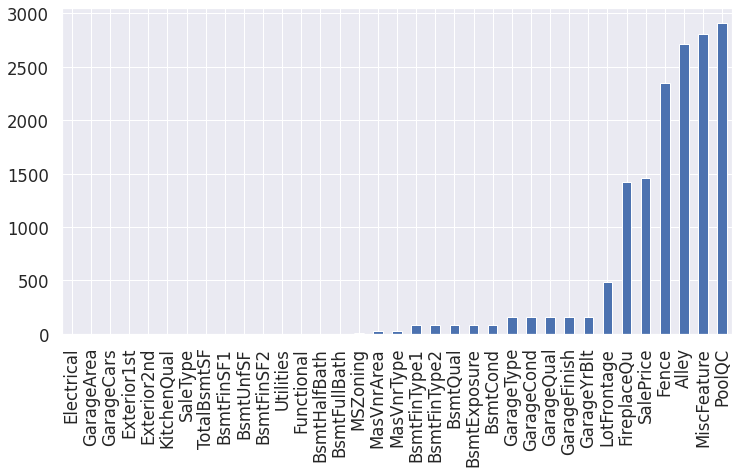

In [ ]:
missing=data.isnull().sum()
missing=missing[missing>0] #결측값이 하나라도 있는것
missing.sort_values(inplace=True)#결측값 개수대로 소팅
missing.plot.bar(figsize = (12,6))

##결측값 replace
범주형 변수들의 빈도를 보고 어떻게 대체할지 파악하자

In [ ]:
for cat in list(nominal_features) :
    print(data[cat].value_counts())
    print('#'*50)

20     1078
60      571
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64
##################################################
RL         2260
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
##################################################
Pave    2902
Grvl      12
Name: Street, dtype: int64
##################################################
Lvl    2620
HLS     119
Bnk     115
Low      60
Name: LandContour, dtype: int64
##################################################
Inside     2131
Corner      508
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64
##################################################
NAmes      442
CollgCr    267
OldTown    239
Edwards    192
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSi

In [ ]:
##nomial_features
data['MSZoning'].fillna("RL", inplace = True) #최빈값
data.Alley.fillna("NO", inplace = True) #최빈값
data.Utilities.fillna('AllPub',inplace = True)#최빈값
data.Exterior1st.fillna("VinylSd", inplace = True)#최빈값
data.Exterior2nd.fillna("VinylSd", inplace = True)#최빈값
data.MasVnrArea.fillna(0., inplace=True)#최빈값
data.SaleCondition.fillna("Normal", inplace = True)#최빈값
data.KitchenQual.fillna("TA", inplace = True)
data.Functional.fillna('Typ', inplace = True)
data.GarageType.fillna("No", inplace = True)#없다는 뜻
data.Fence.fillna("No", inplace = True)#없다
data.MiscFeature.fillna("No", inplace = True)#없다
data.SaleType.fillna("Con", inplace = True)# 결측값 한개라서 제일 빈도수 낮은거에 포함시키기
##ordinal_features
data.BsmtCond.fillna("No", inplace=True)#없다는 뜻
data.BsmtQual.fillna("No", inplace=True)
data.FireplaceQu.fillna("No", inplace = True)
data.GarageType.fillna("No", inplace = True)
data.BsmtExposure.fillna("NB", inplace=True) #NA(없음) 하고 NB(모름)차이점을 두기 위헤
data.BsmtFinType1.fillna("NB", inplace=True)
data.BsmtFinType2.fillna("NB", inplace=True)
data.Electrical.fillna("SBrkr", inplace = True) #최빈값
data.GarageFinish.fillna("No", inplace = True)
data.GarageQual.fillna("No", inplace = True)
data.GarageCond.fillna("No", inplace = True)
data.PoolQC.fillna("No", inplace = True)
#continuous_features
data.BsmtFinSF1.fillna(0., inplace=True)
data.BsmtFinSF2.fillna(0., inplace=True)
data.BsmtUnfSF.fillna(0., inplace=True)
data.TotalBsmtSF.fillna(0., inplace=True)
data.BsmtFullBath.fillna(0., inplace=True)
data.BsmtHalfBath.fillna(0., inplace=True)
data.GarageYrBlt.fillna(0, inplace = True)
data.GarageCars.fillna(0, inplace = True)
data.GarageArea.fillna(0, inplace = True)

In [ ]:
data['LotFrontage'] = data.groupby(['Neighborhood', 'Street'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))
#LotFrontage는 Neighborhood와 Street을 아예 범주형 변수별로 그룹화해서 그 중앙값으로 대체하였음.

#Feature Engineering 파생변수만들기

1. age를 범주형으로 만들기 (최신식 / 보통 / 오래된집)


미국아파트의 평균수명은 71.95년이다. 우리나라는 26.95년이고 5년 단위로 신축 , 준신축 으로 나뉘게 된다. 미국아파트의 수명이 약 3배가량 높으므로 대략적으로 15년 단위로 구간을 나누어보겠다.

참고자료 : https://www.hankyung.com/realestate/article/202112263772i
https://www.sciencetimes.co.kr/news/%EC%95%84%ED%8C%8C%ED%8A%B8%EB%8A%94-%EC%96%B8%EC%A0%9C-%EB%8A%99%EA%B3%A0-%EC%96%B4%EB%96%BB%EA%B2%8C-%EB%B3%80%ED%95%B4%EA%B0%80%EB%82%98/

In [ ]:
data['BuiltAge']= max(data['YrSold'])-data[['YrSold']] #최댓값에서 빼주고 지어진지 몇년이 되었는지 저장해주자

In [ ]:
data[['RemodAge']]= max(data['YearRemodAdd'])-data[['YearRemodAdd']] #최댓값에서 빼주고 remdeling 몇년이 되었는지 저장해주자
data.head()

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Set,BuiltAge,RemodAge
0,0,1,60,RL,65.0,8450,Pave,NO,Reg,Lvl,...,No,0,2,2008,WD,Normal,208500.0,Train,2,7
1,1,2,20,RL,80.0,9600,Pave,NO,Reg,Lvl,...,No,0,5,2007,WD,Normal,181500.0,Train,3,34
2,2,3,60,RL,68.0,11250,Pave,NO,IR1,Lvl,...,No,0,9,2008,WD,Normal,223500.0,Train,2,8
3,3,4,70,RL,60.0,9550,Pave,NO,IR1,Lvl,...,No,0,2,2006,WD,Abnorml,140000.0,Train,4,40
4,4,5,60,RL,84.0,14260,Pave,NO,IR1,Lvl,...,No,0,12,2008,WD,Normal,250000.0,Train,2,10


In [ ]:
stan=[
      (0, 0,15),
      (1,15,30),
      (2,30,45),
      (3,45,60),
      (4,60,75),
      (5,75,90),
      (6,90,105),
      (7,105,120),
      (8,120,135),
]
def feature_eng(df):

    for item in stan:
        df.loc[
            (df["BuiltAge"] >= item[1]) & (df["BuiltAge"] <= item[2]),
            "age_scale",]=item[0]
        df.loc[
                 (df["RemodAge"] >= item[1]) & (df["RemodAge"] <= item[2]),
            "age_scale",]=item[0]
    df['age_scale']=df['age_scale'].astype(int)

    return df

In [ ]:
data=feature_eng(data)

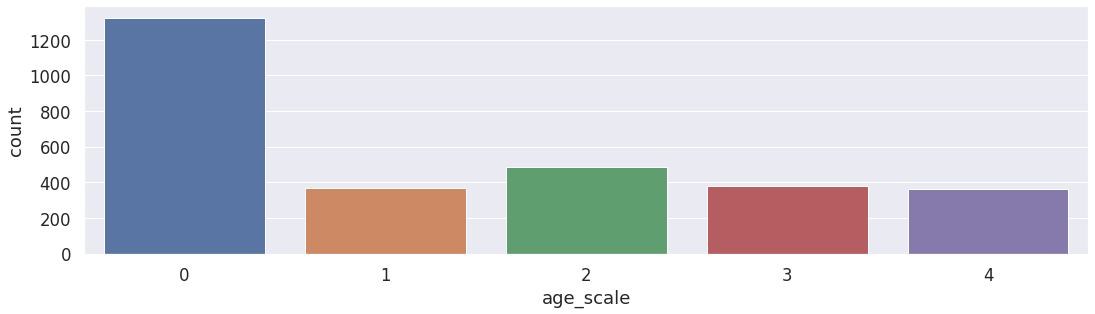

In [ ]:
plt.figure(figsize=(18,10))

plt.subplot(211)
sns.countplot(data = data , x = "age_scale")
plt.show()

2. 리모델링 했는지 안했는지

In [ ]:
print(sorted(data['BuiltAge'].unique())) 
print(sorted(data['RemodAge'].unique()))

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


두개의 길이가 다른 것은 리모델링되지 않은것이 있기때문이다. 이 데이터에서는 리모델링되지 않은것이 yearbuilt = remodaddage 로 처리되어있다.

In [ ]:
data['IsRemod']=[0 for i in range(data.shape[0])]
data.head()

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Set,BuiltAge,RemodAge,age_scale,IsRemod
0,0,1,60,RL,65.0,8450,Pave,NO,Reg,Lvl,...,2,2008,WD,Normal,208500.0,Train,2,7,0,0
1,1,2,20,RL,80.0,9600,Pave,NO,Reg,Lvl,...,5,2007,WD,Normal,181500.0,Train,3,34,2,0
2,2,3,60,RL,68.0,11250,Pave,NO,IR1,Lvl,...,9,2008,WD,Normal,223500.0,Train,2,8,0,0
3,3,4,70,RL,60.0,9550,Pave,NO,IR1,Lvl,...,2,2006,WD,Abnorml,140000.0,Train,4,40,2,0
4,4,5,60,RL,84.0,14260,Pave,NO,IR1,Lvl,...,12,2008,WD,Normal,250000.0,Train,2,10,0,0


In [ ]:
for i in range(data.shape[0]):
    if data.loc[i]['BuiltAge']==data.loc[i]['RemodAge']:
        data.loc[i,'IsRemod']=1
data.head()

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Set,BuiltAge,RemodAge,age_scale,IsRemod
0,0,1,60,RL,65.0,8450,Pave,NO,Reg,Lvl,...,2,2008,WD,Normal,208500.0,Train,2,7,0,0
1,1,2,20,RL,80.0,9600,Pave,NO,Reg,Lvl,...,5,2007,WD,Normal,181500.0,Train,3,34,2,0
2,2,3,60,RL,68.0,11250,Pave,NO,IR1,Lvl,...,9,2008,WD,Normal,223500.0,Train,2,8,0,0
3,3,4,70,RL,60.0,9550,Pave,NO,IR1,Lvl,...,2,2006,WD,Abnorml,140000.0,Train,4,40,2,0
4,4,5,60,RL,84.0,14260,Pave,NO,IR1,Lvl,...,12,2008,WD,Normal,250000.0,Train,2,10,0,0


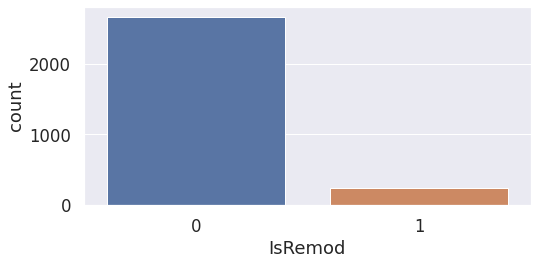

In [ ]:
plt.figure(figsize=(8,8))

plt.subplot(211)
sns.countplot(data = data , x = "IsRemod")
plt.show()

3. 2층집인지 아닌지

In [ ]:
data['Is2nd']=[1 for i in range(data.shape[0])]
data.head()

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,YrSold,SaleType,SaleCondition,SalePrice,Set,BuiltAge,RemodAge,age_scale,IsRemod,Is2nd
0,0,1,60,RL,65.0,8450,Pave,NO,Reg,Lvl,...,2008,WD,Normal,208500.0,Train,2,7,0,0,1
1,1,2,20,RL,80.0,9600,Pave,NO,Reg,Lvl,...,2007,WD,Normal,181500.0,Train,3,34,2,0,1
2,2,3,60,RL,68.0,11250,Pave,NO,IR1,Lvl,...,2008,WD,Normal,223500.0,Train,2,8,0,0,1
3,3,4,70,RL,60.0,9550,Pave,NO,IR1,Lvl,...,2006,WD,Abnorml,140000.0,Train,4,40,2,0,1
4,4,5,60,RL,84.0,14260,Pave,NO,IR1,Lvl,...,2008,WD,Normal,250000.0,Train,2,10,0,0,1


In [ ]:
data.loc[(data['2ndFlrSF']==0),'Is2nd']=0

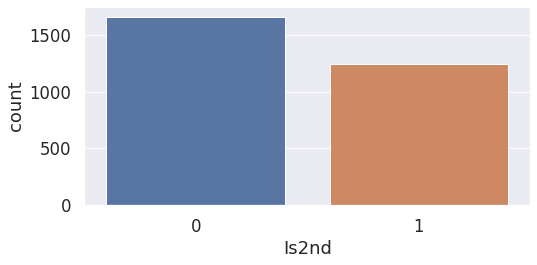

In [ ]:
plt.figure(figsize=(8,8))

plt.subplot(211)
sns.countplot(data = data , x = "Is2nd")
plt.show()

In [ ]:
#feature들을 타입변경하거나 이상치 처리하여 score값 높이기 ----> 중요!!
data.BsmtFullBath.replace(3.0, 2.0, inplace=True) #better score (3은 2개밖에 없으니 그냥 이상치 처리하기)
data.BsmtFullBath = data.BsmtFullBath.astype('int')
data.BsmtHalfBath = data.BsmtHalfBath.astype('int')
data.KitchenAbvGr = pd.cut(data.KitchenAbvGr,2) #딱 2등분하기!
data.KitchenAbvGr = data.KitchenAbvGr.astype('category').cat.rename_categories([0, 1])
data.Fireplaces = data.Fireplaces.apply(lambda row: 2 if row >= 2 else row)
data.Fireplaces = data.Fireplaces.astype('int')
data['GarageAgeCat'] = data.GarageYrBlt.apply(lambda row: 'recent' if row >= 2000 else 'old') #새로운 파생변수
data.GarageCars = data.GarageCars.astype('int')

orninal feature encoding하기

In [ ]:
from sklearn.preprocessing import StandardScaler
mm = StandardScaler()

In [ ]:
#ordinal feature encoding ....
marks = {"No":0, "Po": 1, 'Fa': 2, "TA": 3, 'Gd': 4, 'Ex': 5}

def mark_to_num(mark):
    return marks[mark]

data['ExterQual'] = data['ExterQual'].apply(mark_to_num)
data['ExterCond'] = data['ExterCond'].apply(mark_to_num)
data['HeatingQC'] = data['HeatingQC'].apply(mark_to_num)
data['KitchenQual'] = data['KitchenQual'].apply(mark_to_num)
data['FireplaceQu'] = data['FireplaceQu'].apply(mark_to_num)
data['GarageQual'] = data['GarageQual'].apply(mark_to_num)
data['GarageCond'] = data['GarageCond'].apply(mark_to_num)
data['PoolQC'] = data['PoolQC'].apply(mark_to_num)
data['BsmtCond'] = data['BsmtCond'].apply(mark_to_num)
data['BsmtQual'] = data['BsmtQual'].apply(mark_to_num)

다른 파생변수들도 만들어보자

In [ ]:
data['BsmtFinSF'] = data.BsmtFinSF1 + data.BsmtFinSF2
data['Porch'] = data.ScreenPorch + data.EnclosedPorch + data.OpenPorchSF + data.WoodDeckSF + data['3SsnPorch']
data['Total_surface'] = data.TotalBsmtSF + data['1stFlrSF'] + data['2ndFlrSF']
data['Age'] = data.YrSold - data.YearBuilt
data['RemodAge'] = data.YrSold - data.YearRemodAdd
data['GarageAge'] = data.YrSold - data.GarageYrBlt
data['Overall'] = (data['OverallCond'] * data.OverallQual)
data['External_Overall'] = data['ExterCond'] * data['ExterQual']
data['LotArea_log'] = np.log(data['LotArea'])
data["Spaciousness"] = (data['1stFlrSF'] + data['2ndFlrSF']) / data.TotRmsAbvGrd
data['Porch_types'] = data[['ScreenPorch', 'EnclosedPorch', 'OpenPorchSF', 'WoodDeckSF', '3SsnPorch']].gt(0.0).sum(axis=1)
data['WOW'] = np.sqrt(data['Overall'] * data['GrLivArea']) # WOW factor
data["MedNhbdArea"] = data.groupby("Neighborhood")["GrLivArea"].transform("median")
data['GarageOverall'] = data.GarageQual * data.GarageCond
data['GarageWow'] = data.GarageOverall * data.GarageArea
data['BsmtWow'] = data.BsmtCond * data.BsmtFinSF 
data['Freshness'] = data.Age * data.RemodAge 
data['Newness'] = np.sqrt(data.YearRemodAdd * data.GrLivArea)

In [ ]:
data['MSZ_Age'] =(data.groupby(['MSZoning'])['Age'].transform(lambda x: x.median()) + data.Age)/2
data[['MSZ_Age']] = mm.fit_transform(data[['MSZ_Age']])

In [ ]:
data['Gar_Age']=(data.groupby(['GarageAge'])['Age'].transform(lambda x: x.median()) + data.Age)/2

In [ ]:
data['New'] = data.Age.apply(lambda row: 1 if row == 0 else 0) #만들어지자 마자 팔린것
data['SaleTypeCat'] = data.SaleType
data['SaleConditionCat'] = data.SaleCondition

만들어진 파생변수가 유의한가?

In [ ]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [ ]:
from sklearn.feature_selection import mutual_info_regression
_X = data[data.Set == "Train"].copy()
_X.drop(['index','Id'], axis=1, inplace =True)
mi_scores = make_mi_scores(_X, _X.pop('SalePrice'))
mi_scores.head(30) #Slaeprice에 영향 많이 끼치는 순서

Total_surface    0.678280
WOW              0.635759
OverallQual      0.578992
Neighborhood     0.526642
Newness          0.507025
MedNhbdArea      0.482788
Overall          0.455275
MSZ_Age          0.439504
GrLivArea        0.431183
YearBuilt        0.413782
Freshness        0.401451
LotArea          0.394084
GarageWow        0.373771
TotalBsmtSF      0.370128
GarageArea       0.369289
Age              0.366479
GarageCars       0.366472
Gar_Age          0.353327
KitchenQual      0.333259
BsmtQual         0.328639
ExterQual        0.328339
RemodAge         0.294736
MSSubClass       0.285219
1stFlrSF         0.280830
YearRemodAdd     0.278423
GarageFinish     0.265724
GarageYrBlt      0.259727
FullBath         0.258359
GarageAge        0.258188
Spaciousness     0.249183
Name: MI Scores, dtype: float64

In [ ]:
mi_scores.tail(30)

BsmtFullBath     2.813247e-02
LandContour      2.808575e-02
Alley            2.483846e-02
Is2nd            2.306450e-02
EnclosedPorch    2.241643e-02
Condition1       2.232919e-02
KitchenAbvGr     2.114864e-02
ScreenPorch      1.995827e-02
ExterCond        1.921695e-02
LotConfig        1.525377e-02
Heating          1.508931e-02
BsmtHalfBath     1.334555e-02
BsmtFinSF2       9.875088e-03
RoofStyle        7.859919e-03
LowQualFinSF     6.167613e-03
LandSlope        3.750296e-03
Functional       2.593970e-03
3SsnPorch        2.492278e-03
MiscFeature      2.393691e-03
RoofMatl         2.377882e-03
Condition2       5.810085e-04
MiscVal          4.145858e-04
PoolArea         1.998401e-15
Set              1.110223e-15
Utilities        2.220446e-16
MoSold           0.000000e+00
PoolQC           0.000000e+00
BuiltAge         0.000000e+00
YrSold           0.000000e+00
Street           0.000000e+00
Name: MI Scores, dtype: float64

연관성이 없다고 무조건 버려서는 안된다. 시각화할때 유용하게 쓰일수도 있다.

#탐색적 자료분석

일단 수치형변수들을 추려내자

가장 먼저 다중공선성을 확인해야한다.
barplot이나 boxplot으로 확인하면 다른 변수에 의해 경향성이 있는 것처럼 보이거나 경향성이 있는것도 없게 만들 수 있기떄문이다. (억압변수)


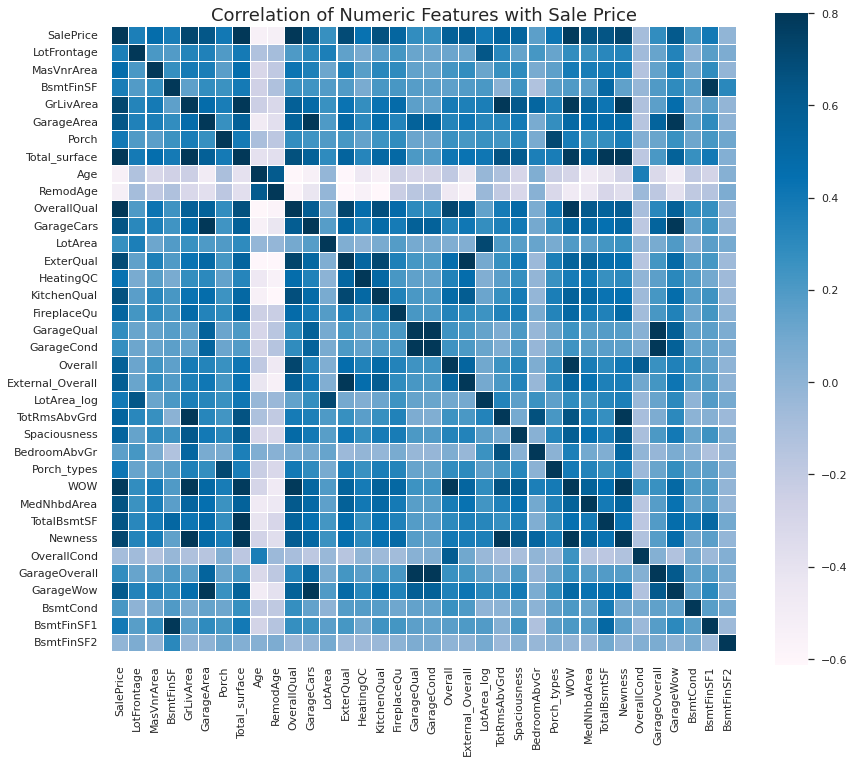

In [ ]:
#Correlation HeatMap 
corr_data = data[['SalePrice','LotFrontage','MasVnrArea','BsmtFinSF','GrLivArea','GarageArea','Porch','Total_surface', 'Age','RemodAge','OverallQual', 'GarageCars','LotArea',
           'ExterQual','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','Overall','External_Overall', 'LotArea_log',
                  'TotRmsAbvGrd', "Spaciousness", 'BedroomAbvGr', 'Porch_types','WOW',"MedNhbdArea", 'TotalBsmtSF', 'Newness', 'SaleType','OverallCond','HouseStyle',
                  'GarageType', 'SaleCondition','MSSubClass','GarageOverall','GarageWow','BsmtCond','BsmtFinSF1','BsmtFinSF2']] #모든 수치형 data

colormap = plt.cm.PuBu
sns.set(font_scale=1.0)

f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with Sale Price',y=1,size=18)
sns.heatmap(corr_data.corr(),square = True, linewidths = 0.1,
            cmap = colormap, linecolor = "white", vmax=0.8)

다중공선성이 있는 변수들을 살펴보자

**(TotalBsmtSF , 1stFlrSF)** #지하실 면적, #첫번째층 면적

**(GrLivArea,TotRmsAbvGrd )** #living area 크기, 총 객실수

**(GrLivArea, GarageCars**) #living area크기 , 차고지의 주차면적

**(GraageArea, GarageCars)** #차고지의 주차면적 #차고지면적

**(YrBlt, GarageYrBlt)** #건축연도, garage건축년도

그런데 생각해보면 위의 변수는 당연히 연관성이 있다고 생각될 수 밖에 없는것들이다. 따라서 연관성이 적은 변수는 그냥 버려도된다.

Index(['SalePrice', 'Total_surface', 'OverallQual', 'WOW', 'Newness',
       'GrLivArea', 'ExterQual', 'KitchenQual', 'MedNhbdArea', 'GarageCars',
       'TotalBsmtSF'],
      dtype='object')


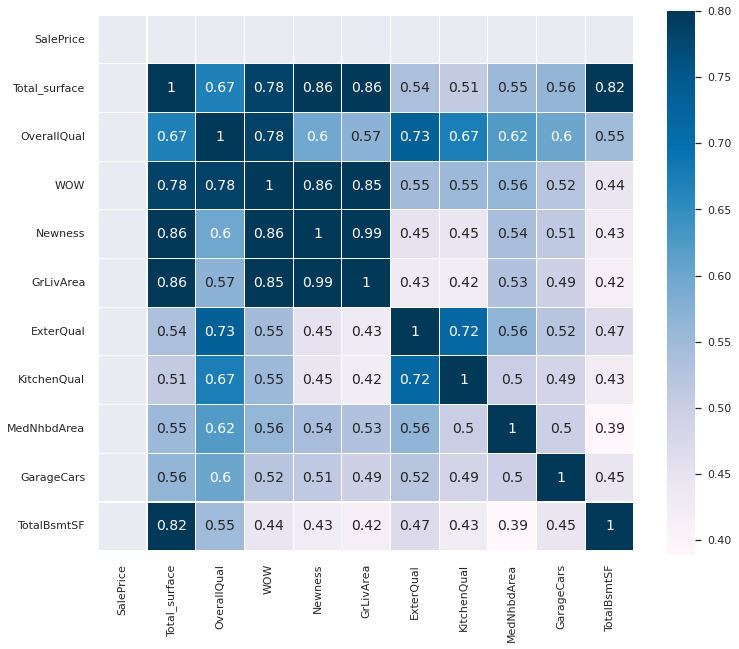

In [ ]:
#Zoomed Heat Map
k= 11
cols = corr_data.corr().nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(data[cols].values.T)
f , ax = plt.subplots(figsize = (12,10))
sns.heatmap(cm, vmax=.8, linewidths=0.1,square=True,annot=True,cmap=colormap,
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':14},yticklabels = cols.values)
#target과 가장 연관성이 높다고 할 수 있는 상위11개를 뽑았다.
#우리는 제일 연관성이 높은 GrLivArea는 살려두고 GarageCar가 더 target을 잘설명하므로 GarageArea를 버릴것이다.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


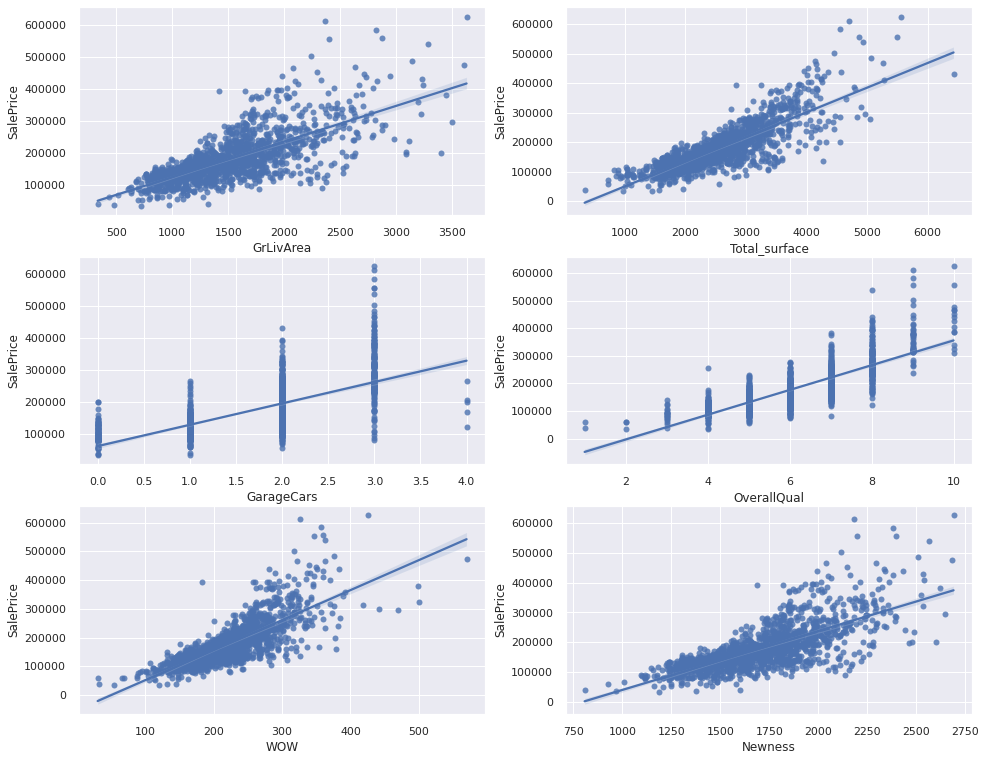

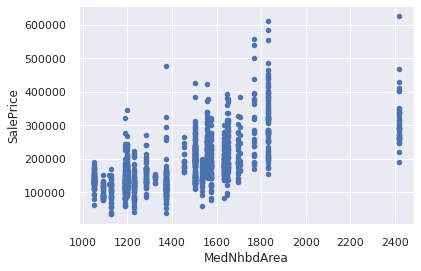

In [ ]:
#위에서 추린 수치형변수들이 saleprice와 어떤 연관성을 보이는지 scatter Plot을 그려보자
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(16,13))
GrLivArea_scatter_plot = pd.concat([data['SalePrice'],data['GrLivArea']],axis = 1)
sns.regplot(x='GrLivArea',y = 'SalePrice',data = GrLivArea_scatter_plot,scatter= True, fit_reg=True, ax=ax1)
TotalBsmtSF_scatter_plot = pd.concat([data['SalePrice'],data['Total_surface']],axis = 1)
sns.regplot(x='Total_surface',y = 'SalePrice',data = TotalBsmtSF_scatter_plot,scatter= True, fit_reg=True, ax=ax2)
GarageCars_scatter_plot = pd.concat([data['SalePrice'],data['GarageCars']],axis = 1)
sns.regplot(x='GarageCars',y = 'SalePrice',data = GarageCars_scatter_plot,scatter= True, fit_reg=True, ax=ax3)
FullBath_scatter_plot = pd.concat([data['SalePrice'],data['OverallQual']],axis = 1)
sns.regplot(x='OverallQual',y = 'SalePrice',data = FullBath_scatter_plot,scatter= True, fit_reg=True, ax=ax4)
YearBuilt_scatter_plot = pd.concat([data['SalePrice'],data['WOW']],axis = 1)
sns.regplot(x='WOW',y = 'SalePrice',data = YearBuilt_scatter_plot,scatter= True, fit_reg=True, ax=ax5)
YearRemodAdd_scatter_plot = pd.concat([data['SalePrice'],data['Newness']],axis = 1)
sns.regplot(x='Newness',y = 'SalePrice',data = YearRemodAdd_scatter_plot,scatter= True, fit_reg=True, ax=ax6)
TotRmsAbvGrd_scatter_plot = pd.concat([data['SalePrice'],data['MedNhbdArea']],axis = 1)
TotRmsAbvGrd_scatter_plot.plot.scatter('MedNhbdArea','SalePrice')
#대부분 양의 상관성을 띄는것같다.

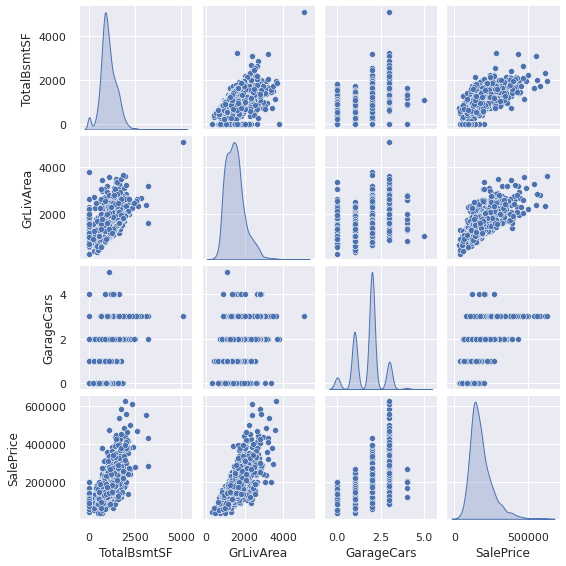

In [ ]:
sns.set()
high_corr = ['Total_surface', 'OverallQual', 'WOW', 'Newness',
       'GrLivArea', 'ExterQual', 'KitchenQual', 'MedNhbdArea', 'GarageCars',
       'TotalBsmtSF']
high_continuous = [i for i in continuous_features if i in high_corr]
high_continuous.append('SalePrice')
sns.pairplot(data[high_continuous],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

###피처들의 관찰시기에 맞게 YrSold , Month로 시계열 데이터도 그려보자

In [ ]:
s_data=data[['YrSold','MoSold','SalePrice']].groupby(['YrSold','MoSold']).mean()
s_data=s_data.reset_index()

In [ ]:
t_data=s_data.pivot('YrSold','MoSold','SalePrice')
t_data.head()

MoSold,1,2,3,4,5,6,7,8,9,10,11,12
YrSold,,,,,,,,,,,,
2006,201090.00,194322.222222,184982.200000,174312.814815,158928.289474,172283.333333,183211.059701,196239.956522,223768.866667,172356.708333,213285.000000,185545.000000
2007,135587.50,176301.750000,176567.782609,170772.608696,169873.511628,179725.813559,184404.780000,183941.075000,195533.818182,217474.066667,197709.333333,214414.500000
2008,180046.75,159370.000000,178505.277778,159293.346154,188334.473684,169730.941176,174562.653061,196076.965517,169626.470588,166690.636364,209042.375000,175600.000000
2009,189735.50,187450.000000,171547.368421,181680.769231,164482.945946,183260.932203,197984.409836,165670.966667,196849.350000,175206.592593,156381.818182,164014.533333
2010,163852.60,174823.333333,203181.285714,171344.025641,178422.250000,181639.583333,121750.000000,NaN,NaN,NaN,NaN,NaN


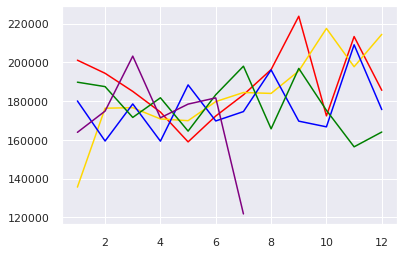

In [ ]:
s_data=data[['YrSold','MoSold','SalePrice']].groupby(['YrSold','MoSold']).mean()
plt.plot(s_data.loc[2006],color='red')
plt.plot(s_data.loc[2007],color="gold")
plt.plot(s_data.loc[2008],color='blue')
plt.plot(s_data.loc[2009],color='green')
plt.plot(s_data.loc[2010],color='purple')
plt.show()
#딱히 유의미한 의미를 얻지 못하였다. 판매 년도, 월은 딱히 영향이 없어보인다.
#그러므로 시계열 분해법으로 분해해봐야할필요가 있다. 하지만 본 프로젝트에서는 시계열을 깊게 다루지 않을것이다.
#또한 YrSold가 크게 의미있는 피처가 아니므로 차후 시계열기법을 주로 사용하는 프로젝트에서 다시 다루겠다.

#범주형 변수도 EDA를 하자

##nominal_features별로 y축을 YrSold로 두었을때 같은 경향성을 띄는지 봐야한다. 이는 히트맵으로 할것이다.

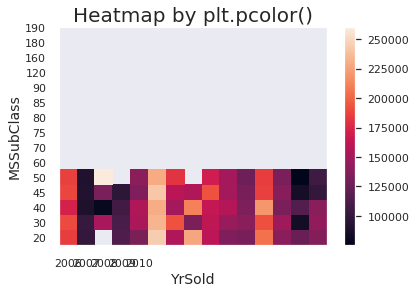

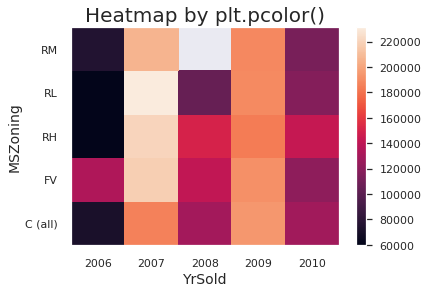

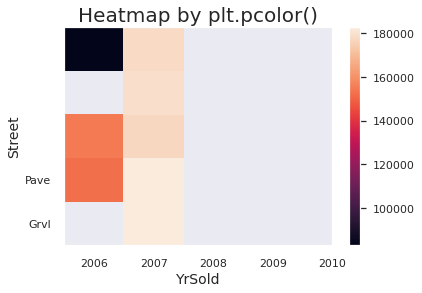

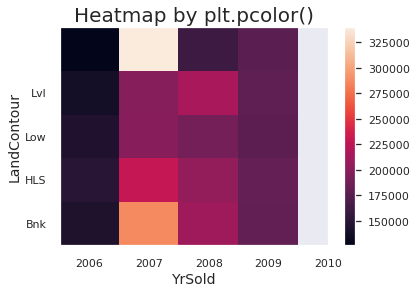

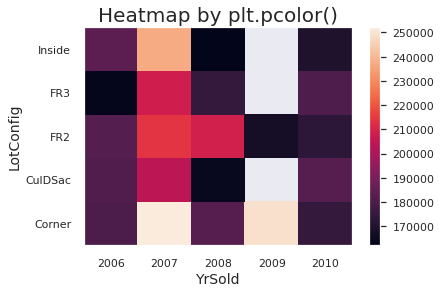

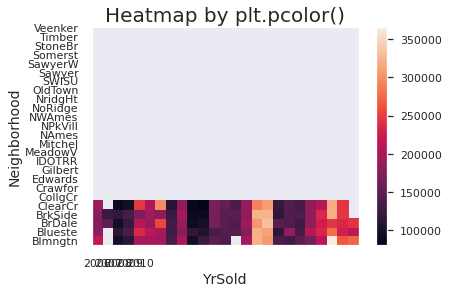

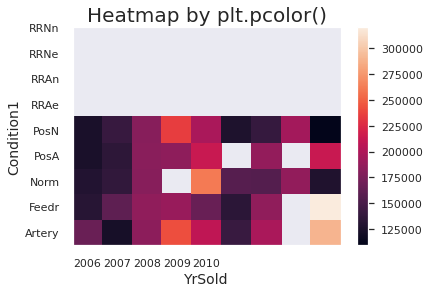

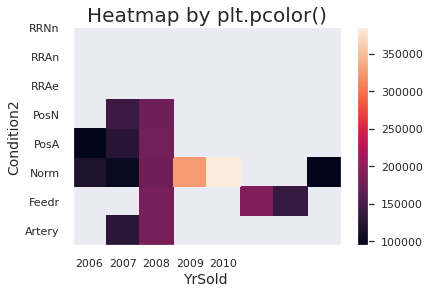

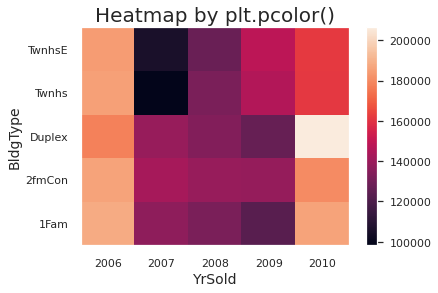

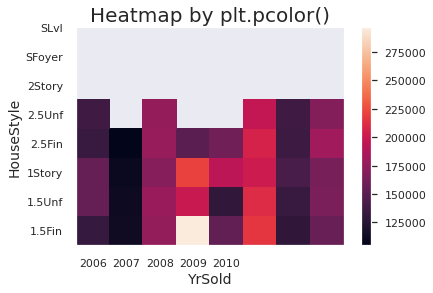

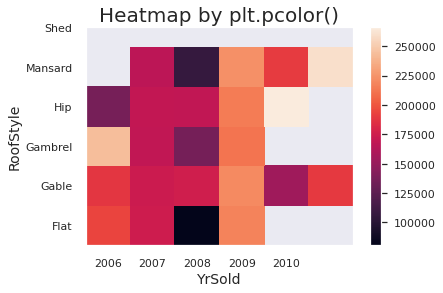

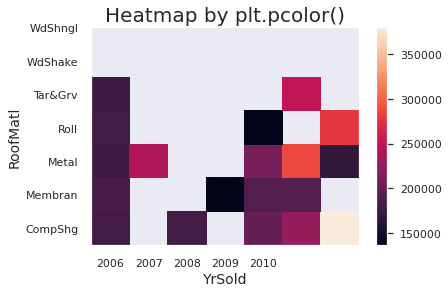

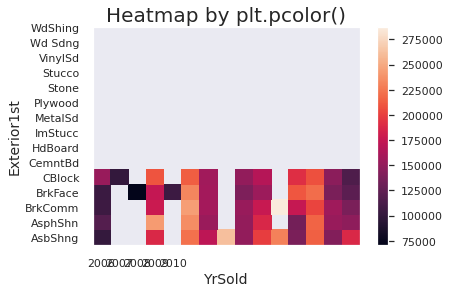

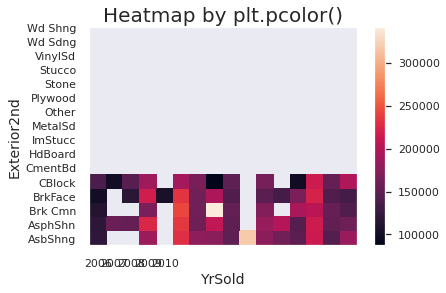

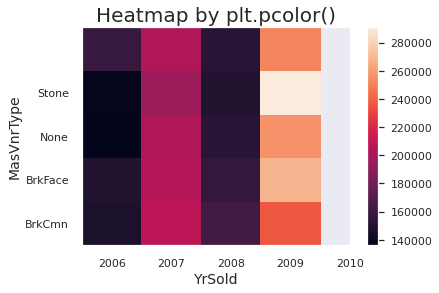

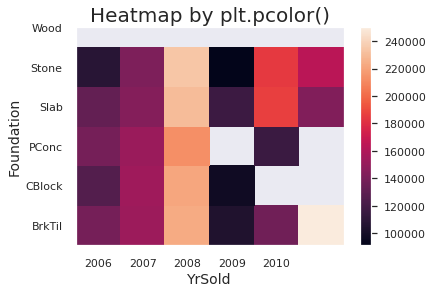

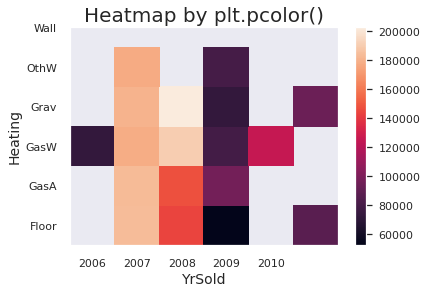

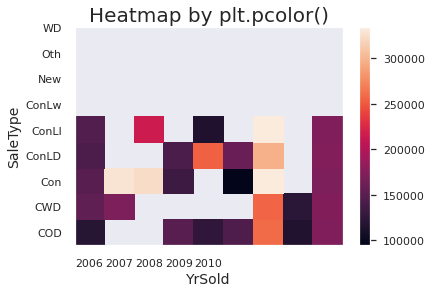

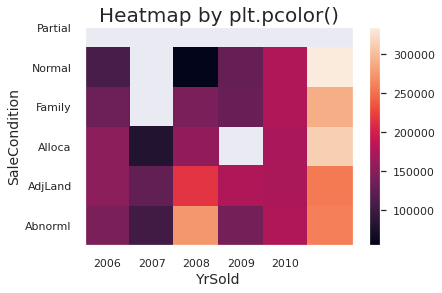

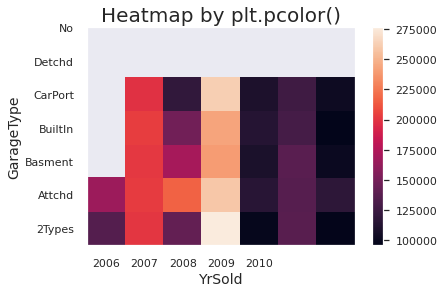

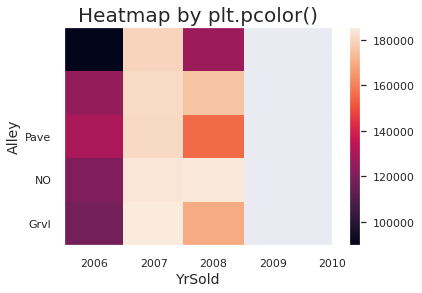

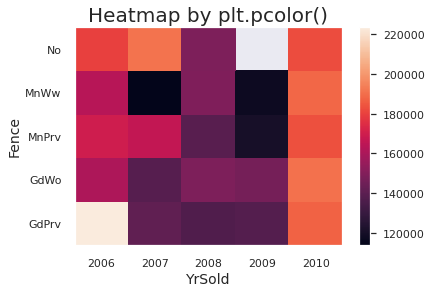

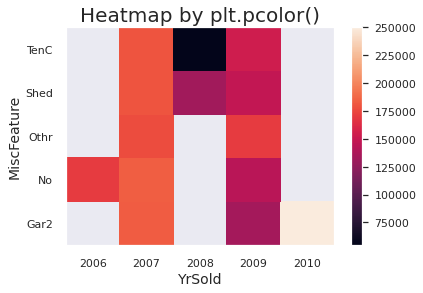

In [ ]:
# heatmap by plt.pcolor()
for i in nominal_features:
  s_data=data[data['Set']=='Train'][['YrSold',i,'SalePrice']].groupby(['YrSold',i]).mean()
  s_data=s_data.reset_index()
  t_data=s_data.pivot('YrSold',i,'SalePrice')
  plt.pcolor(t_data)
  plt.xticks(np.arange(0.5, len(t_data.index), 1), t_data.index)
  plt.yticks(np.arange(0.5, len(t_data.columns), 1), t_data.columns)
  plt.title('Heatmap by plt.pcolor()', fontsize=20)
  plt.xlabel('YrSold', fontsize=14)
  plt.ylabel(i, fontsize=14)
  plt.colorbar()
  plt.show()

####2007년도가 saleprice가 높은것으로 보인다. 왜인지 이유를 알아보자


#####LotArea와 Freshness가 눈에 띈다.
#####LotArea:  평방피트 /Freshness : 집 년식
#####가정: 2007년에 팔린 집은 넓은 집이다! 그래서 saleprice가 높다.


##### 상관관계 heatmap을 보니 GrLivarea , GarageArea 등 평방미터는 집값에 큰 영향을 주는것 같다. -> 채택

In [ ]:
# c_f_data1=data[data['YrSold']==2007]
# a=c_f_data1.describe()

In [ ]:
# c_f_data2=data[data['YrSold']!=2007]
# b=c_f_data2.describe()

In [ ]:
# (a-b).T['mean'].sort_values(ascending=False)

가정2 : 2007년도에 팔린 집은 지어지자 마자 팔린 비율이 더 클것이다?
-> 약 두배차이로 채택!

In [ ]:
# len(c_f_data1[c_f_data1['SaleType']=='New'])/len(c_f_data1)

In [ ]:
# len(c_f_data2[c_f_data2['SaleType']=='New'])/len(c_f_data2)

In [ ]:
data['Is2007'] = data.YrSold.apply(lambda row: 1 if row == 2007 else 0)

2007년도인것 / 아닌것이 꽤 의미있어보이므로 파생변수로 만들것이다.

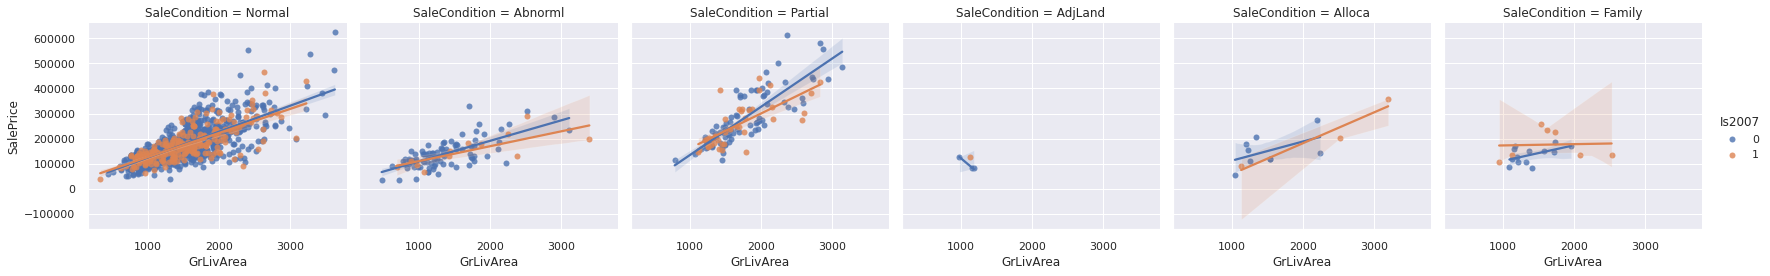

In [ ]:
sns.lmplot(
    x='GrLivArea', y="SalePrice", hue='Is2007', col='SaleCondition',
    data=data[data.Set == "Train"], scatter_kws={"edgecolor": 'w'}, col_wrap=6, height=4,
);
#모두 같은 경향을 보인다. 별로 유의미해보이지 않음.

##다른 nominal변수들을 시각화해보자. ANOVA를 시각화한것과 동일하다고 생각하면된다. x축은 saleprice와 연관성이 높은 변수로 두었다.

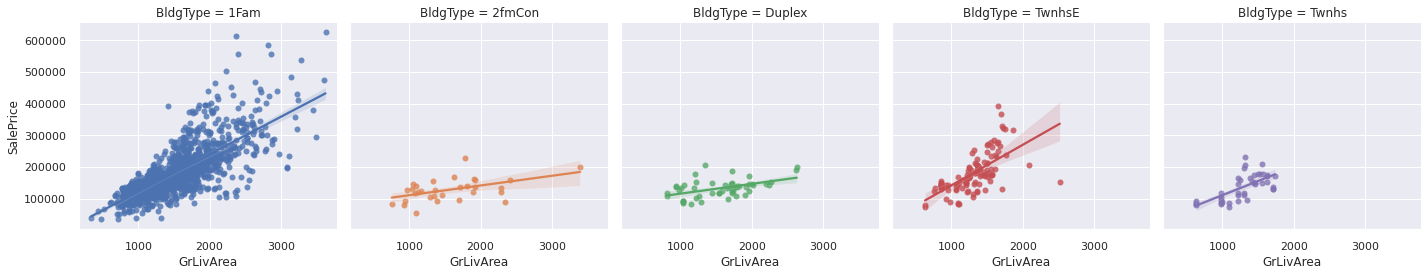

In [ ]:
sns.lmplot(
    x='GrLivArea', y="SalePrice", hue="BldgType", col="BldgType",
    data=data[data.Set == "Train"], scatter_kws={"edgecolor": 'w'}, col_wrap=5, height=4,
);
#모두 같은 경향을 보인다. 별로 유의미해보이지 않음.

In [ ]:
X1 = pd.get_dummies(data.BldgType, prefix = 'Bldg')
X1 = X1.mul(data.GrLivArea, axis=0)
X1[X1.columns] = mm.fit_transform(X1[X1.columns])

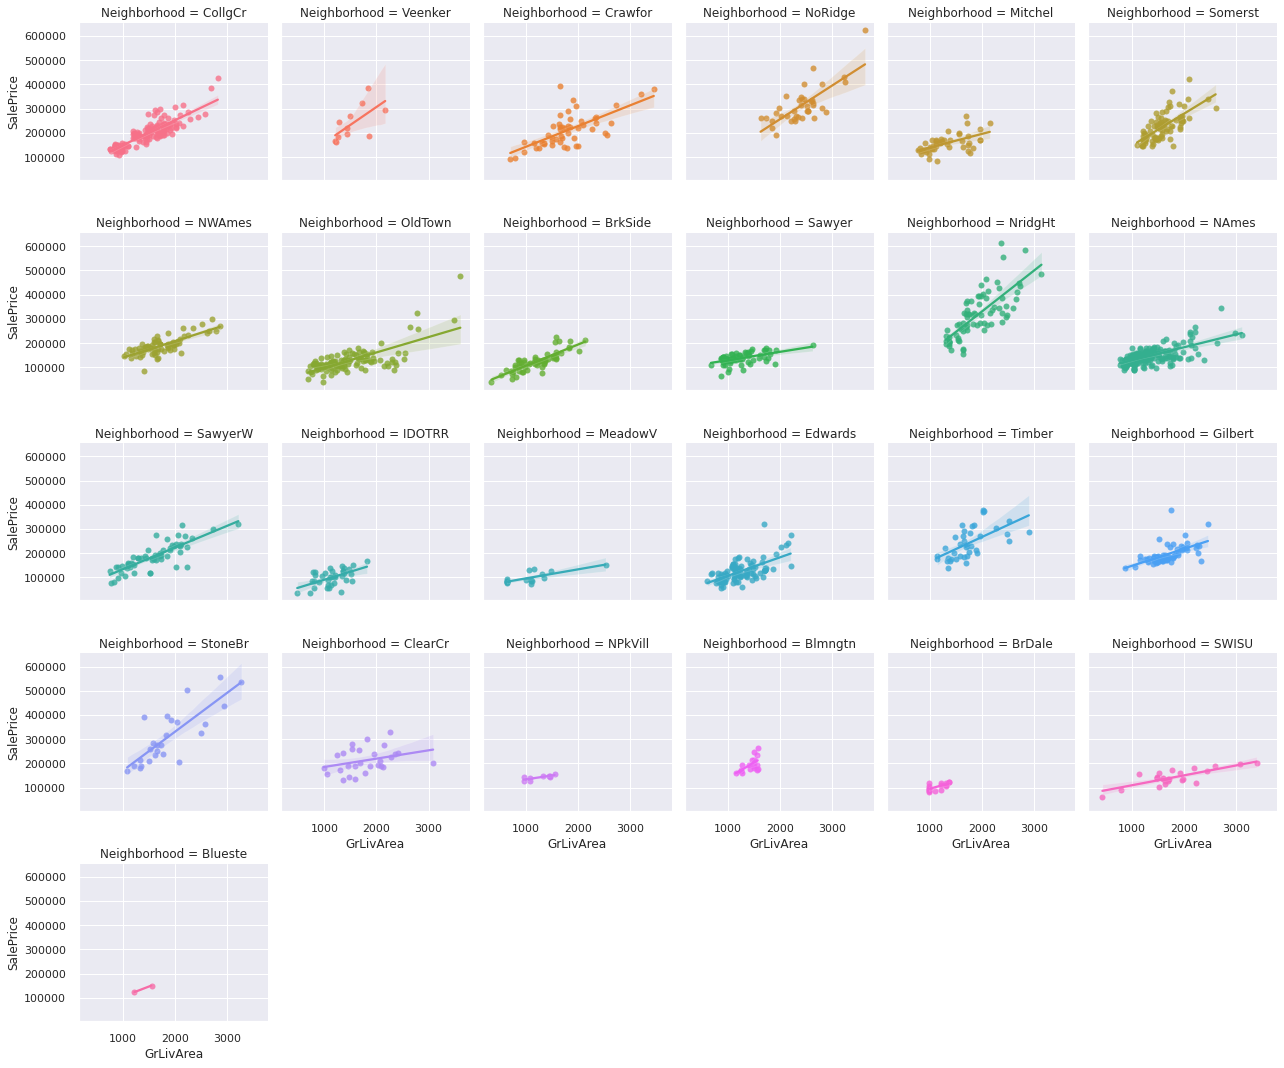

In [ ]:
sns.lmplot(
    x='GrLivArea', y="SalePrice", hue="Neighborhood", col="Neighborhood",
    data=data[data.Set == "Train"], scatter_kws={"edgecolor": 'w'}, col_wrap=6, height=3,
);
#모두 같은 경향을 보인다. 별로 유의미해보이지 않음.

In [ ]:
X2 = pd.get_dummies(data.Neighborhood, prefix = 'NB')
X2 = X2.mul(data.GrLivArea, axis=0)
X2[X2.columns] = mm.fit_transform(X2[X2.columns])

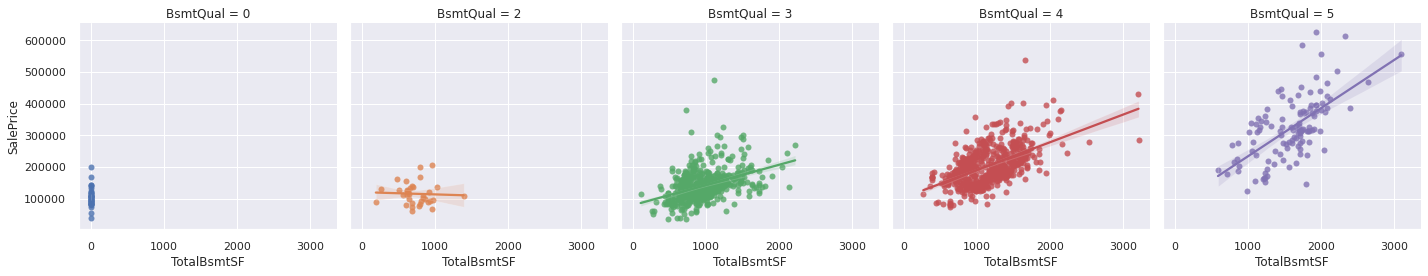

In [ ]:
sns.lmplot(
    x='TotalBsmtSF', y="SalePrice", hue="BsmtQual", col="BsmtQual",
    data=data[data.Set == "Train"], scatter_kws={"edgecolor": 'w'}, col_wrap=5, height=4,
);

In [ ]:
X3 = pd.get_dummies(data.BsmtQual, prefix = 'BSQ')
X3 = X3.mul(data.TotalBsmtSF, axis=0)
X3[X3.columns] = mm.fit_transform(X3[X3.columns])

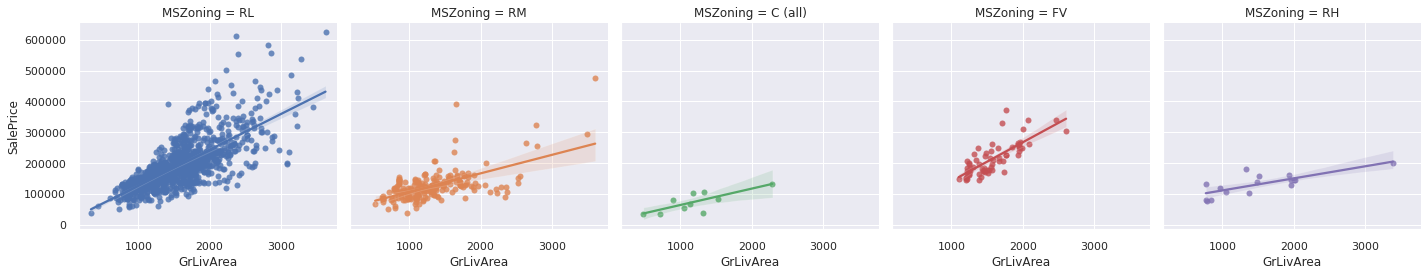

In [ ]:
sns.lmplot(
    x='GrLivArea', y="SalePrice", hue='MSZoning', col='MSZoning',
    data=data[data.Set == "Train"], scatter_kws={"edgecolor": 'w'}, col_wrap=5, height=4,
);
#모두 같은 경향을 보인다. 별로 유의미해보이지 않음.

In [ ]:

X4 = pd.get_dummies(data.MSZoning, prefix = 'MSZ')
X4 = X4.mul(data.GrLivArea, axis=0)
X4[X4.columns] = mm.fit_transform(X4[X4.columns])

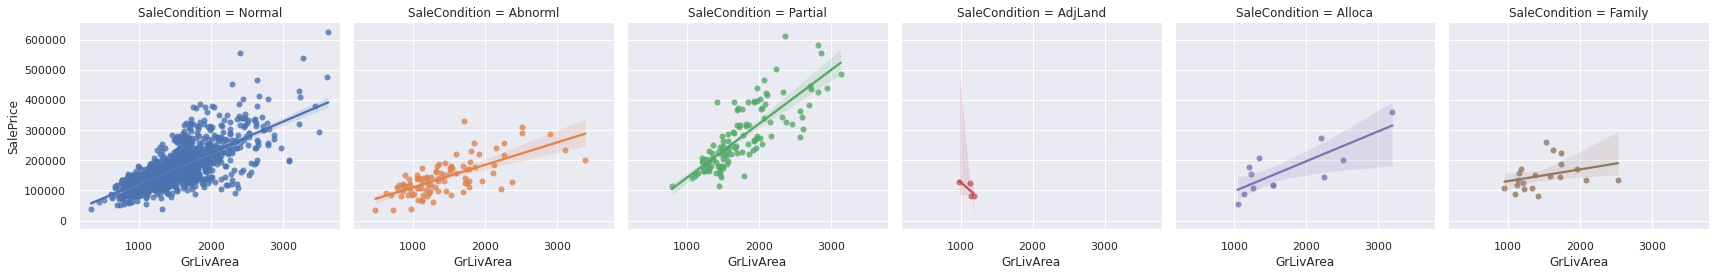

In [ ]:
sns.lmplot(
    x='GrLivArea', y="SalePrice", hue='SaleCondition', col='SaleCondition',
    data=data[data.Set == "Train"], scatter_kws={"edgecolor": 'w'}, col_wrap=6, height=4,
);

In [ ]:

X5 = pd.get_dummies(data.SaleCondition, prefix = 'SaleCond')
X5 = X5.mul(data.GrLivArea, axis=0)
X5[X5.columns] = mm.fit_transform(X5[X5.columns])

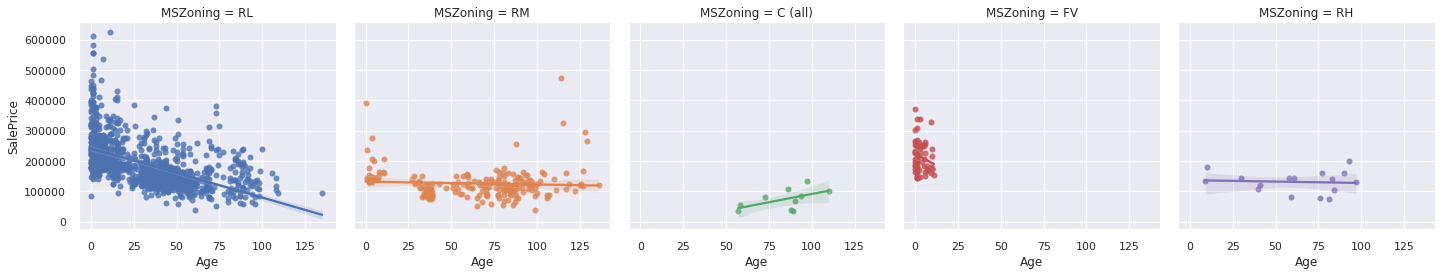

In [ ]:
sns.lmplot(
    x='Age', y="SalePrice", hue='MSZoning', col='MSZoning',
    data=data[data.Set == "Train"], scatter_kws={"edgecolor": 'w'}, col_wrap=6, height=4,
);

In [ ]:
X6 = pd.get_dummies(data.MSZoning, prefix = 'MSZ')
X6 = X6.mul(data.Age, axis=0)
X6[X6.columns] = mm.fit_transform(X6[X6.columns])

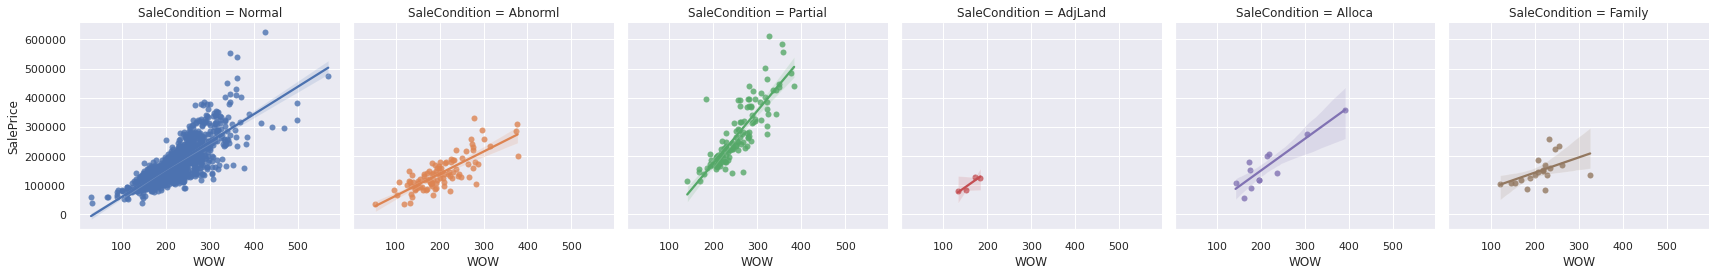

In [ ]:
sns.lmplot(
    x='WOW', y="SalePrice", hue='SaleCondition', col='SaleCondition',
    data=data[data.Set == "Train"], scatter_kws={"edgecolor": 'w'}, col_wrap=6, height=4,
);
#모두 같은 경향을 보인다. 별로 유의미해보이지 않음.

In [ ]:
X7 = pd.get_dummies(data.SaleCondition, prefix = 'SC2')
X7 = X7.mul(data.WOW, axis=0)
X7[X7.columns] = mm.fit_transform(X7[X7.columns])

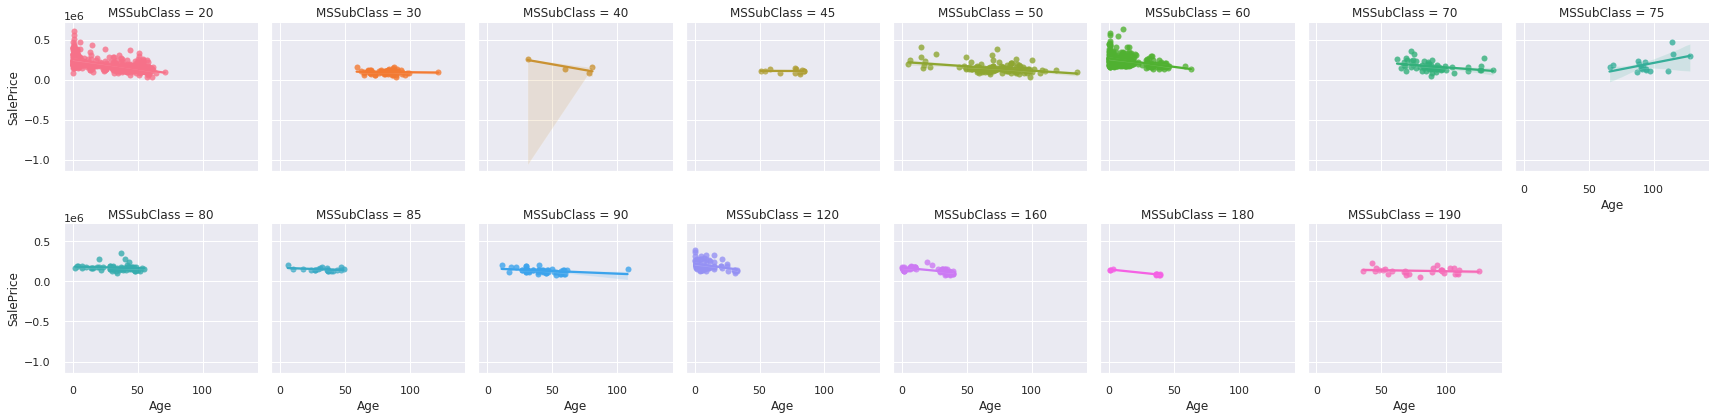

In [ ]:
sns.lmplot(
    x='Age', y="SalePrice", hue='MSSubClass', col='MSSubClass',
    data=data[data.Set == "Train"], scatter_kws={"edgecolor": 'w'}, col_wrap=8, height=3,
);

In [ ]:
X8 = pd.get_dummies(data.MSSubClass, prefix = 'MSSC_AGE')
X8 = X8.mul(data.Age, axis=0)
X8[X8.columns] = mm.fit_transform(X8[X8.columns])

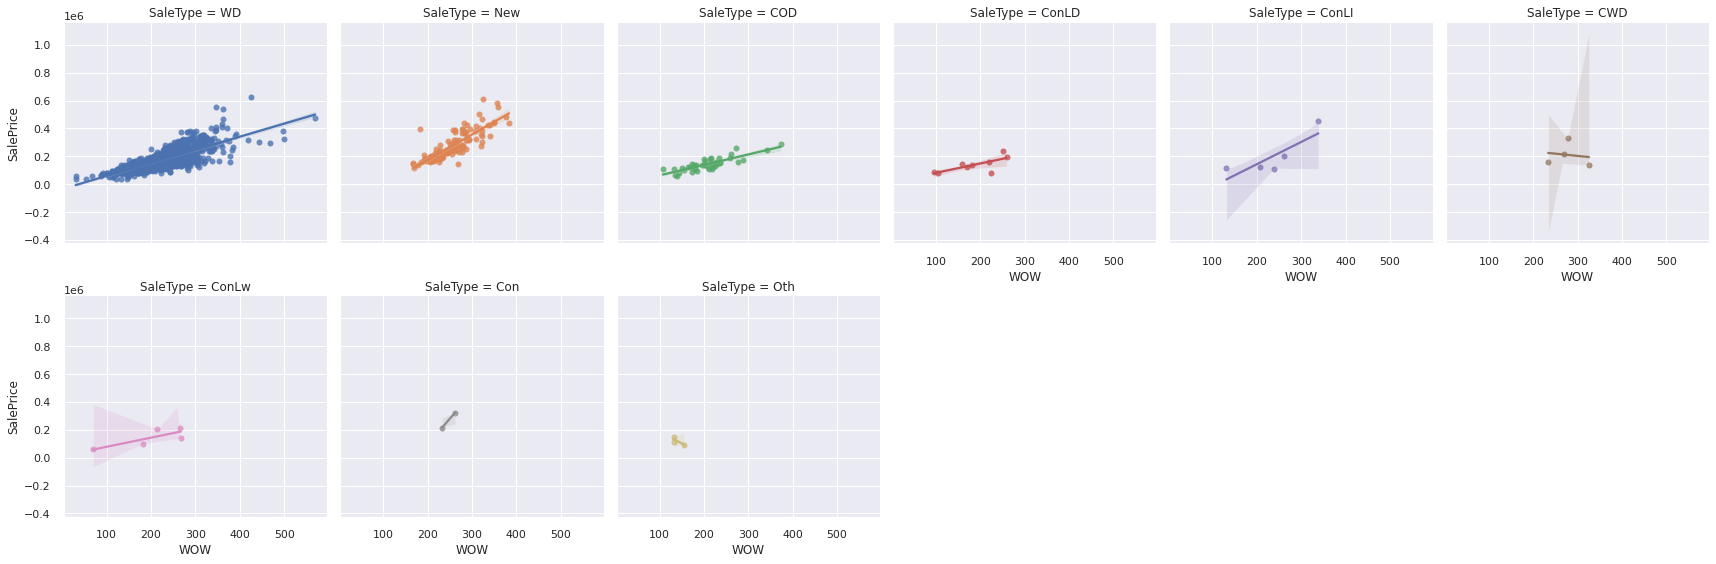

In [ ]:
sns.lmplot(
    x='WOW', y="SalePrice", hue='SaleType', col='SaleType',
    data=data[data.Set == "Train"], scatter_kws={"edgecolor": 'w'}, col_wrap=6, height=4,
);

In [ ]:
X9 = pd.get_dummies(data.SaleType, prefix = 'ST')
X9 = X9.mul(data.WOW, axis=0)
X9[X9.columns] = mm.fit_transform(X9[X9.columns])

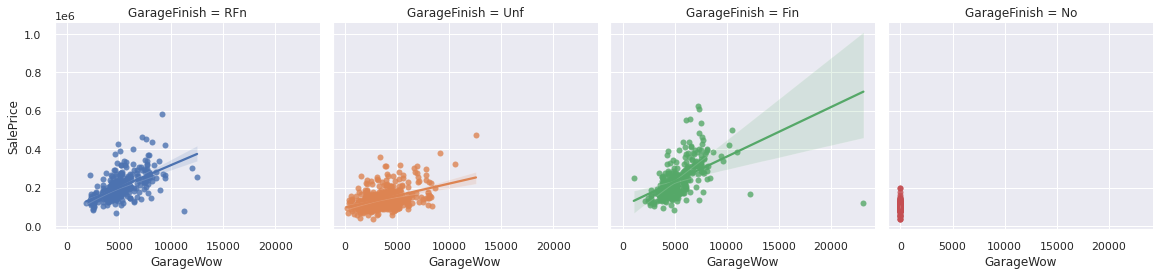

In [ ]:
sns.lmplot(
    x='GarageWow', y="SalePrice", hue='GarageFinish', col='GarageFinish',
    data=data[data.Set == "Train"], scatter_kws={"edgecolor": 'w'}, col_wrap=6, height=4,
);
#모두 같은 경향을 보인다. 별로 유의미해보이지 않음.

In [ ]:
#excluded
X10 = pd.get_dummies(data.GarageFinish, prefix = 'GF')
X10 = X10.mul(data.GarageWow, axis=0)
X10[X10.columns] = mm.fit_transform(X10[X10.columns])

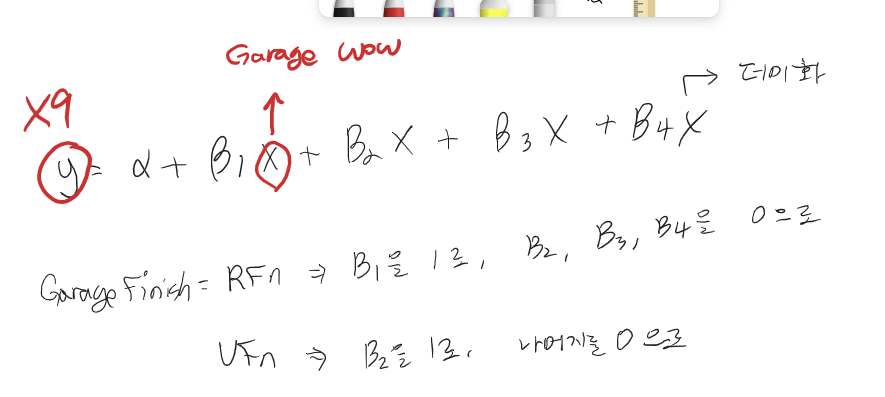

#Target encoding

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 6.9 MB/s 


In [ ]:
from category_encoders import MEstimateEncoder
encode_features = ['MSSubClass','SaleType','OverallCond','HouseStyle','GarageType', 'SaleCondition']
#encode_features = ['MSSubClass','SaleType','OverallCond','HouseStyle','GarageType', 'SaleCondition','MSZoning']
X_encode = data[data.Set == 'Train'].sample(frac=0.2, random_state=13)
y_encode = X_encode.pop("SalePrice")

In [ ]:
encoder = MEstimateEncoder(cols=encode_features,m=1)
encoder.fit(X_encode, y_encode)
ENC = encoder.transform(data.drop("SalePrice", axis=1))
data[encode_features] = ENC[encode_features]
data[encode_features]=mm.fit_transform(data[encode_features])

In [ ]:
drop_cols = ['LowQualFinSF','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
             'MiscVal','MoSold','YrSold','1stFlrSF','2ndFlrSF' ,'BsmtUnfSF', 'YearBuilt','YearRemodAdd', 'BldgType','Neighborhood','MiscFeature','Street', 'PoolQC',
             'LandSlope','RoofMatl','LotConfig','RoofStyle','BsmtHalfBath','Functional','Heating','MSZ_Age','BsmtWow', 'Freshness','GarageFinish','IsRemod','GarageAge','Is2007']
categorical = sorted(['Alley','LotShape','LandContour','MasVnrType','Foundation','BsmtExposure','Electrical', 'BsmtFullBath','HalfBath','FullBath',
                'Fireplaces','KitchenAbvGr','PavedDrive','Fence','GarageAgeCat','Utilities','ExterCond', 'CentralAir', 'MSZoning',
                     'SaleTypeCat','SaleConditionCat',"New","BsmtQual"])
numeric = sorted(['LotFrontage','MasVnrArea','BsmtFinSF','GrLivArea','GarageArea','Porch','Total_surface', 'Age','RemodAge','OverallQual', 'GarageCars','LotArea',
           'ExterQual','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','Overall','External_Overall', 'LotArea_log',
                  'TotRmsAbvGrd', "Spaciousness", 'BedroomAbvGr', 'Porch_types','WOW',"MedNhbdArea", 'TotalBsmtSF', 'Newness', 'SaleType','OverallCond','HouseStyle',
                  'GarageType', 'SaleCondition','MSSubClass','GarageOverall','GarageWow','BsmtCond'])

In [ ]:
data=data.drop(drop_cols,axis=1)

In [ ]:
data[numeric] = data[numeric].astype('float')
data[numeric]=mm.fit_transform(data[numeric])

In [ ]:
data[categorical]=data[categorical].astype('category')
data=pd.get_dummies(data, columns=categorical,drop_first=True)

####double categories 는 하나로 묶고 난 후에 더미화 시켜야한다.  => 넣으면 성능 안좋아지고 과적합되므로 모두 제외

In [ ]:
# #1. condition1,2
# cond = data[['Condition1','Condition2']]
# condition_cats = ["Condition_"+s for s in set([*cond.Condition1.unique(), *cond.Condition2.unique()])]
# COND_FRAME = pd.DataFrame(columns=condition_cats, index = data.index).fillna(0)
# for i in cond.index:
#     cs = set(cond.loc[i, ['Condition1','Condition2']].values)
#     for c in cs:
#         COND_FRAME.loc[i]["Condition_"+c] = 1

     
# data = data.join(COND_FRAME)
data.drop(['Condition1','Condition2'], axis=1, inplace = True)

Exterior1st, Exterior2nd

In [ ]:
# ext = data[['Exterior1st','Exterior2nd']]
# ext_cats = ["Ext_"+s for s in set([*ext.Exterior1st.unique(), *ext.Exterior2nd.unique()])]
# EXT_FRAME = pd.DataFrame(columns=ext_cats, index = data.index).fillna(0)
# for i in ext.index:
#     cs = set(ext.loc[i, ['Exterior1st','Exterior2nd']].values)
#     for c in cs:
#         EXT_FRAME.loc[i]["Ext_"+c] = 1

# EXT_FRAME = EXT_FRAME.mul(data.GrLivArea, axis=0)   
# data = data.join(EXT_FRAME)
data.drop(['Exterior1st','Exterior2nd'], axis=1, inplace = True)

BsmtFinType1, BsmtFinType2

In [ ]:
# mulCols = ['BsmtFinSF1','BsmtFinSF2']
# bf = data[['BsmtFinType1','BsmtFinType2']]
# bf_cats = ["BF_"+s for s in set([*bf.BsmtFinType1.unique(), *bf.BsmtFinType2.unique()])]
# BF_FRAME = pd.DataFrame(columns=bf_cats, index = data.index).fillna(0).astype("float")

# for i in bf.index:
#     cs = set(bf.loc[i, ['BsmtFinType1','BsmtFinType2']].values)
#     for j,c in enumerate(cs):
#         BF_FRAME.loc[i]["BF_"+c] =  data.loc[i][mulCols[j]]
#         #BF_FRAME.loc[i]["BF_"+c] =  1

# data = data.join(BF_FRAME)
data.drop(['BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2'], axis=1, inplace = True)

##요인분석

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo

In [ ]:
kmo_all,kmo_model=calculate_kmo(data[numeric])
kmo_model #0.82로 훌륭하다 요인분석을 계속 할 수 있다.

0.8297104014205815

In [ ]:
#요인 개수 선택
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=len(numeric),rotation=None)
fa.fit(data[numeric])
ev,v=fa.get_eigenvalues()

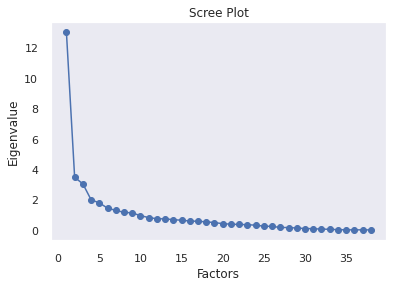

In [ ]:
plt.scatter(range(1,len(numeric)+1),ev)
plt.plot(range(1,len(numeric)+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Eigen값이 1이상일때까지 or 그래프 기울기가 완만해지기 전까지 여야 데이터 결함을 최소화

위와 같은 경우는 10개로 나누어주는 것이 최선임

In [ ]:
#탐색적 요인 분석 실시
component_names = [f"COMP{i+1}" for i in range(0,10)]
fa=FactorAnalyzer(n_factors=10,rotation="varimax")
fa.fit(data[numeric])
result=pd.DataFrame(fa.loadings_,index=numeric,columns=component_names)
result

,COMP1,COMP2,COMP3,COMP4,COMP5,COMP6,COMP7,COMP8,COMP9,COMP10
Age,-0.525049,0.053197,-0.149255,0.017003,-0.249627,-0.161263,-0.227391,0.030797,-0.632044,-0.019225
BedroomAbvGr,-0.087912,0.723186,-0.022288,0.130269,-0.053776,-0.046937,-0.024813,-0.033674,0.072824,-0.072833
BsmtCond,0.211418,0.006316,0.120949,-0.047136,0.354102,0.027063,-0.097068,0.055987,0.023158,-0.029851
BsmtFinSF,0.102105,-0.088050,0.102442,0.182937,0.515247,-0.066567,0.114700,0.120584,0.027453,0.113171
ExterQual,0.786552,0.066006,0.049613,0.023601,0.180853,0.168478,0.203391,0.090689,0.140764,0.083440
External_Overall,0.734996,0.049957,0.092117,0.036499,0.125725,0.081615,0.096754,0.093674,-0.001568,0.050341
FireplaceQu,0.284930,0.244032,0.145363,0.173140,0.190636,0.061247,0.055498,0.202668,0.055215,0.221242
GarageArea,0.350453,0.161387,0.418746,0.207644,0.154526,0.103579,0.734166,0.096146,0.045250,0.099223
GarageCars,0.395197,0.198783,0.428161,0.161659,0.136758,0.101335,0.586628,0.082353,0.146051,0.101013
GarageCond,0.101116,0.005491,0.943265,0.039195,0.072963,0.011244,0.119615,0.033993,0.074573,0.033270


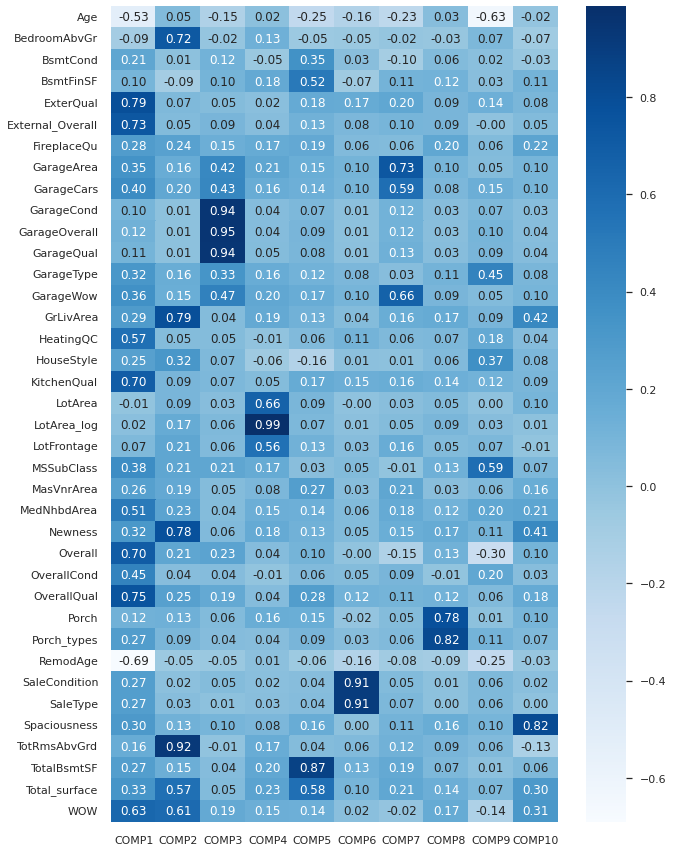

In [ ]:
plt.figure(figsize=(10,15))
sns.heatmap(result,cmap='Blues',annot=True,fmt='.2f')

요인 1은 ExterQual, External_Overall, Overall , OverallQual, WOW 에 적재량이 많고

요인 2은 BedroomAbvGr, GrLivArea, Newness, TotRmsAbvGrd, WOW

요인 3는 GarageCond, GarageOverall, GarageQual

요인 4은 LotArea_log, LotArea, LotFrontage

요인 5는 TotalBsmtSF, Total_surface

요인 6는 SaleCondition, SaleType

요인 7은 GarageArea,GarageCars,GarageWow

요인 8은 Porch, Porch_types

요인 9는 Spaciousness만 적재량이 많으므로 제거
####7개 요인으로 분석

In [ ]:
# fa=FactorAnalyzer(n_factors=7,rotation='varimax')
# fa.fit(data[numeric])

In [ ]:
# fa.get_factor_variance()
# df1=pd.DataFrame(fa.get_factor_variance())
# df1.index=['SS Loadings','Proportion Var','Cumulative Var']
# df1
#유의미 해보이는 변수가 없다.

###요인분석한 변수들로 변수생성 https://dodonam.tistory.com/310

In [ ]:
from sklearn.decomposition import PCA
comp2 = sorted(['BedroomAbvGr', 'GrLivArea', 'Newness', 'TotRmsAbvGrd', 'WOW'])
pca = PCA(1)
X_PCA_2 = pca.fit_transform(data.loc[:, comp2])
X_PCA_2 = pd.DataFrame(X_PCA_2,columns=['PCA2'])

In [ ]:
comp3 = sorted(['GarageCond', 'GarageOverall', 'GarageQual'])
pca = PCA(1)
X_PCA_3 = pca.fit_transform(data.loc[:, comp3])
X_PCA_3 = pd.DataFrame(X_PCA_3, columns=['PCA3'])

In [ ]:
comp4 = sorted(['LotArea_log', 'LotArea', 'LotFrontage'])
pca = PCA(1)
X_PCA_4 = pca.fit_transform(data.loc[:, comp4])
X_PCA_4 = pd.DataFrame(X_PCA_4, columns=['PCA4'])

In [ ]:
comp5 = sorted(['TotalBsmtSF', 'Total_surface'])
pca = PCA(1)
X_PCA_5 = pca.fit_transform(data.loc[:, comp5])
X_PCA_5 = pd.DataFrame(X_PCA_5, columns=['PCA5'])

In [ ]:
comp6= sorted(['SaleCondition', 'SaleType'])
pca = PCA(1)
X_PCA_6 = pca.fit_transform(data.loc[:, comp6])
X_PCA_6 = pd.DataFrame(X_PCA_6, columns=['PCA6'])

In [ ]:
comp7= sorted(['GarageArea','GarageCars','GarageWow'])
pca = PCA(1)
X_PCA_7 = pca.fit_transform(data.loc[:, comp7])
X_PCA_7 = pd.DataFrame(X_PCA_7, columns=['PCA7'])

In [ ]:
comp1 = sorted(['ExterQual', 'External_Overall', 'Overall' , 'OverallQual', 'WOW'])
pca = PCA(1)
X_PCA_1 = pca.fit_transform(data.loc[:, comp1])
X_PCA_1 = pd.DataFrame(X_PCA_1, columns=['PCA1'])
X_PCA_1.shape

(2914, 1)

In [ ]:
a=[f"X_PCA_{i+1}" for i in range(0,7)]
a=list(map(eval, a))

In [ ]:
DATA_PCA=pd.concat(a,axis=1)
DATA_PCA['SalePrice'] = data['SalePrice']
DATA_PCA

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,SalePrice
0,1.320271,1.173040,0.478322,-0.293916,-0.293307,-0.284311,0.584907,208500.0
1,0.260068,-0.328436,0.478322,0.332154,0.339003,-0.284311,0.121375,181500.0
2,1.363772,0.777438,0.478322,0.344126,-0.059557,-0.284311,0.900951,223500.0
3,-0.027389,0.871157,0.478322,-0.188427,-0.543551,-1.250466,1.819854,140000.0
4,2.317240,3.208249,0.478322,1.267204,0.894644,-0.284311,2.841730,250000.0
...,...,...,...,...,...,...,...,...
2909,-1.947172,-1.545645,-6.615484,-3.739859,-1.654031,-0.284311,-3.781252,NaN
2910,-2.547051,-1.464558,0.478322,-3.770488,-1.654031,-1.250466,-1.534964,NaN
2911,-1.014783,0.007176,0.478322,4.045068,0.206729,-1.250466,0.732394,NaN
2912,-1.905464,-1.660206,-6.615484,0.038926,-0.826271,-0.284311,-3.781252,NaN


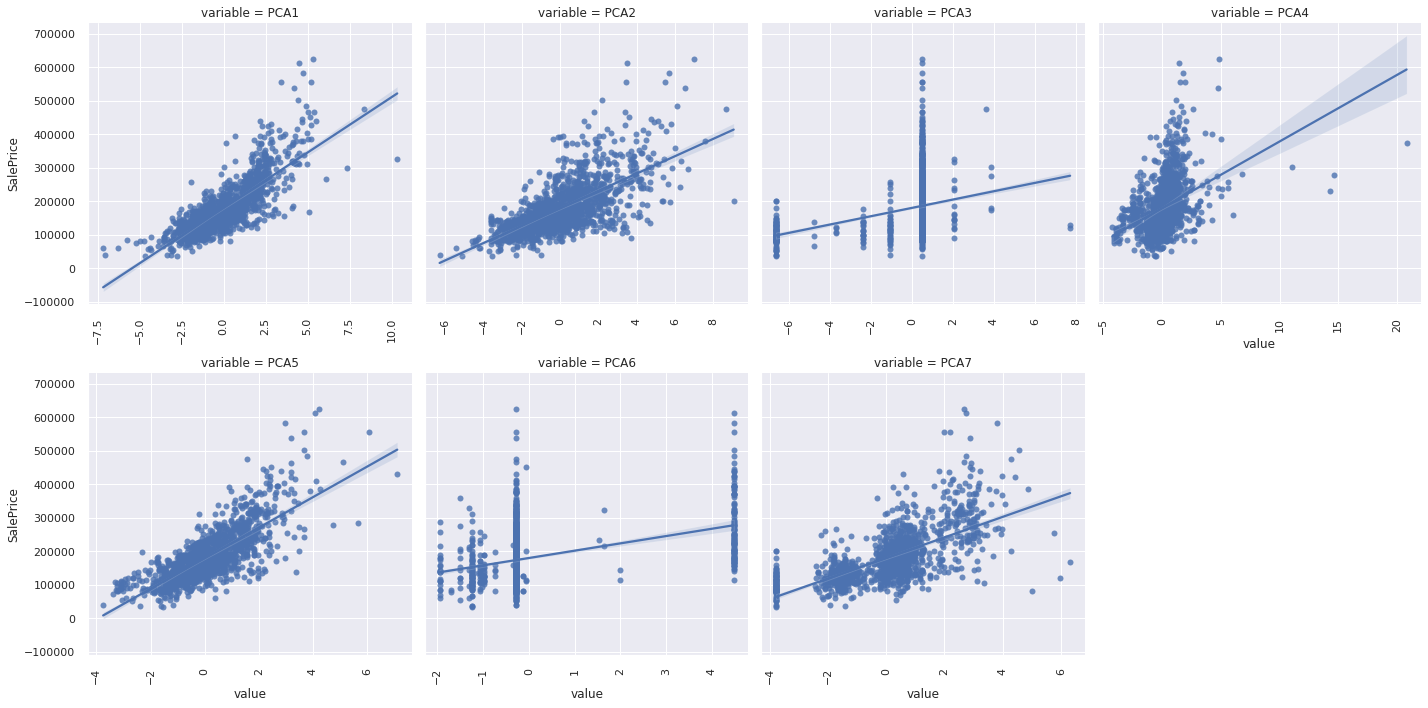

In [ ]:
component_names = [f"PCA{i+1}" for i in range(0,7)]
def scatterplot(x,y,**kwargs):
    sns.regplot(x=x,y=y)
    _=plt.xticks(rotation=90)

f = pd.melt(DATA_PCA, id_vars=['SalePrice'], value_vars=component_names)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=True, height=5)
g = g.map(scatterplot, "value", "SalePrice")
#PCA 결과는 파생변수로 만들지 않을 것임. -> 설명력이 너무 낮아서 차원축소가 잘안된 것으로 보이기때문

##Clustering

In [ ]:
from sklearn.cluster import KMeans
clustering_features = ['GrLivArea','Total_surface', 'LotArea_log', 'Overall','WOW',"Spaciousness",'Porch','BsmtFinSF','Age', 'RemodAge']
kmeans = KMeans(n_clusters = 13, random_state=13)
clust_data = data[data.Set == 'Train'].loc[:, clustering_features]
clust_data['cluster'] = kmeans.fit_predict(clust_data)
clust_data['cluster'] = clust_data['cluster'].astype('category')
clust_data['SalePrice'] = data[data.Set == 'Train']['SalePrice']

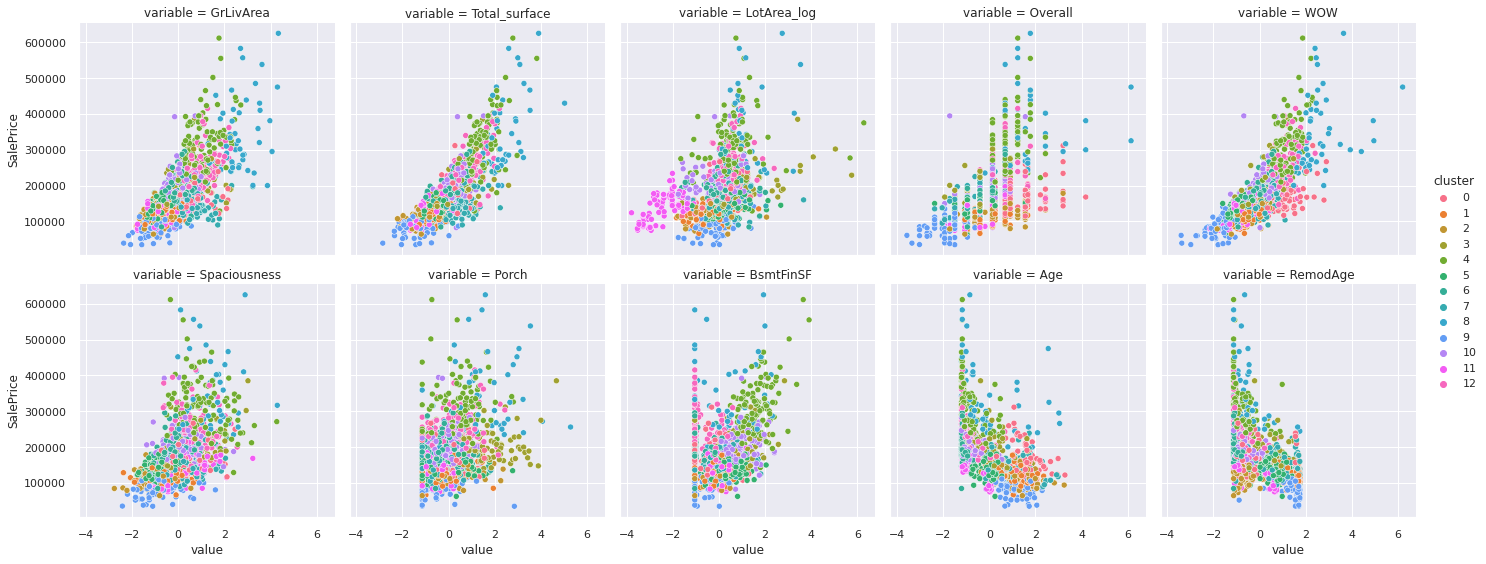

In [ ]:
sns.relplot(data = clust_data.melt(value_vars=clustering_features, id_vars = ["SalePrice", "cluster"]), x="value", y="SalePrice", hue='cluster', col= "variable", col_wrap=5, height=4);

In [ ]:
clust_data = data.loc[:, clustering_features]
X_CD = kmeans.fit_transform(clust_data)
X_CD = mm.fit_transform(X_CD)
X_CD = pd.DataFrame(X_CD, columns=[f"Centroid_{i}" for i in range(X_CD.shape[1])])

In [ ]:
data.head()

,index,Id,MSSubClass,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,MasVnrArea,ExterQual,...,SaleConditionCat_Partial,SaleTypeCat_CWD,SaleTypeCat_Con,SaleTypeCat_ConLD,SaleTypeCat_ConLI,SaleTypeCat_ConLw,SaleTypeCat_New,SaleTypeCat_Oth,SaleTypeCat_WD,Utilities_NoSeWa
0,0,1,1.521669,-0.207606,-0.215097,1.146670,0.653162,0.673438,0.538886,1.046276,...,0,0,0,0,0,0,0,0,1,0
1,1,2,0.101192,0.518613,-0.067651,-0.116461,-0.059423,-0.935465,-0.568652,-0.683076,...,0,0,0,0,0,0,0,0,1,0
2,2,3,1.521669,-0.062363,0.143903,1.146670,0.653162,0.673438,0.346762,1.046276,...,0,0,0,0,0,0,0,0,1,0
3,3,4,-0.820171,-0.449680,-0.074061,1.146670,0.653162,0.673438,-0.568652,-0.683076,...,0,0,0,0,0,0,0,0,1,0
4,4,5,1.521669,0.712272,0.529827,1.146670,1.365747,0.673438,1.409095,1.046276,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
data = data.join([X1, X2,X3, X8, X10,X_CD])
data.head()

,index,Id,MSSubClass,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,MasVnrArea,ExterQual,...,Centroid_3,Centroid_4,Centroid_5,Centroid_6,Centroid_7,Centroid_8,Centroid_9,Centroid_10,Centroid_11,Centroid_12
0,0,1,1.521669,-0.207606,-0.215097,1.146670,0.653162,0.673438,0.538886,1.046276,...,0.193810,-1.390291,-0.400824,0.092554,-0.416582,-1.363013,-0.569687,-1.094943,-0.396990,-0.311168
1,1,2,0.101192,0.518613,-0.067651,-0.116461,-0.059423,-0.935465,-0.568652,-0.683076,...,0.335197,-0.201742,-0.345962,-0.135185,-1.237891,-0.919947,-0.629751,-0.224011,-0.119016,0.007199
2,2,3,1.521669,-0.062363,0.143903,1.146670,0.653162,0.673438,0.346762,1.046276,...,0.500293,-1.096800,0.241596,0.450786,-0.210099,-1.233553,-0.813818,-0.736599,-0.383263,0.273748
3,3,4,-0.820171,-0.449680,-0.074061,1.146670,0.653162,0.673438,-0.568652,-0.683076,...,-0.227395,0.053503,-0.046371,-0.732963,-1.013777,0.024290,-0.123290,0.198124,-1.298720,-0.023628
4,4,5,1.521669,0.712272,0.529827,1.146670,1.365747,0.673438,1.409095,1.046276,...,1.027434,-0.533417,0.724014,0.905646,-0.829870,-1.373987,-1.752049,0.248828,0.067150,0.965452


Skewness: 1.567777
Kurtosis: 3.889917


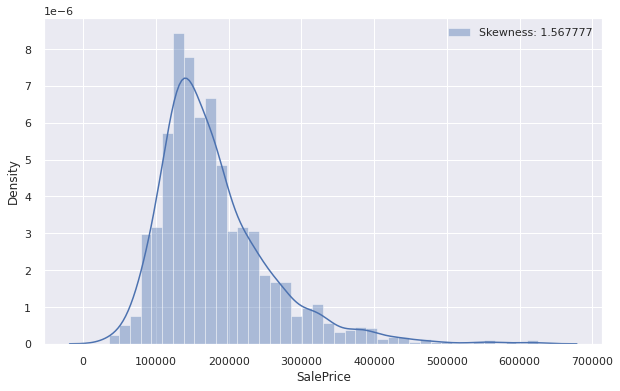

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (10,6))
g = sns.distplot(data[data['Set']=="Train"]["SalePrice"], color = "b", label="Skewness: {:2f}".format(data[data['Set']=="Train"]["SalePrice"].skew()), ax=ax)
g = g.legend(loc = "best")

print("Skewness: %f" % data[data['Set']=="Train"]["SalePrice"].skew())
print("Kurtosis: %f" % data[data['Set']=="Train"]["SalePrice"].kurt())

###target에 대해 log변환을 해줄필요가 있어보인다.

In [ ]:
#Splitting featuers and target
X = data.drop('SalePrice', axis=1)
y = np.log(data['SalePrice'])

In [ ]:
test = X[X['Set']=='Test']
display(test.head())
X = X[X['Set']=='Train']
y=y[:len(X)]
display(X.head())
print('train shape ----> ', X.shape)
print('test shape ----> ', test.shape)
print('train_y shape ----> ', y.shape)
X=X.drop('Set',axis=1)
X=X.drop(["Id","index"],axis=1)
test=test.drop(["index","Set"],axis=1)

,index,Id,MSSubClass,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,MasVnrArea,ExterQual,...,Centroid_3,Centroid_4,Centroid_5,Centroid_6,Centroid_7,Centroid_8,Centroid_9,Centroid_10,Centroid_11,Centroid_12
1455,0,1461,0.101192,0.518613,0.191598,-0.116461,-0.772008,-1.024093,-0.568652,-0.683076,...,-1.147095,0.373126,-1.342986,-1.168209,-0.479967,0.545718,0.775777,0.320648,-0.390173,-0.369249
1456,1,1462,0.101192,0.567028,0.530725,-0.116461,-0.059423,-1.024093,0.041624,-0.683076,...,-0.072230,0.378960,-0.394209,-0.382281,-1.955390,-0.241849,-0.367311,0.551647,-0.688581,0.377234
1457,2,1463,1.521669,0.228125,0.474695,1.146670,-0.772008,0.673438,-0.568652,-0.683076,...,0.001095,-0.753395,-0.361993,0.168687,-1.445351,-1.157402,-0.650086,-0.476224,-0.708366,0.204081
1458,3,1464,1.521669,0.421784,-0.019186,1.146670,-0.059423,-1.024093,-0.455638,-0.683076,...,0.250003,-1.047278,-0.245734,0.094840,-2.157597,-1.370692,-0.831558,-0.709087,-0.363911,-0.028140
1459,4,1465,0.610816,-1.272728,-0.656795,-0.116461,1.365747,0.673438,-0.568652,1.046276,...,0.054824,-1.095098,-0.266601,-0.281035,-0.688377,-0.797376,-0.226050,-1.888447,-0.369149,-0.984362


,index,Id,MSSubClass,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,MasVnrArea,ExterQual,...,Centroid_3,Centroid_4,Centroid_5,Centroid_6,Centroid_7,Centroid_8,Centroid_9,Centroid_10,Centroid_11,Centroid_12
0,0,1,1.521669,-0.207606,-0.215097,1.146670,0.653162,0.673438,0.538886,1.046276,...,0.193810,-1.390291,-0.400824,0.092554,-0.416582,-1.363013,-0.569687,-1.094943,-0.396990,-0.311168
1,1,2,0.101192,0.518613,-0.067651,-0.116461,-0.059423,-0.935465,-0.568652,-0.683076,...,0.335197,-0.201742,-0.345962,-0.135185,-1.237891,-0.919947,-0.629751,-0.224011,-0.119016,0.007199
2,2,3,1.521669,-0.062363,0.143903,1.146670,0.653162,0.673438,0.346762,1.046276,...,0.500293,-1.096800,0.241596,0.450786,-0.210099,-1.233553,-0.813818,-0.736599,-0.383263,0.273748
3,3,4,-0.820171,-0.449680,-0.074061,1.146670,0.653162,0.673438,-0.568652,-0.683076,...,-0.227395,0.053503,-0.046371,-0.732963,-1.013777,0.024290,-0.123290,0.198124,-1.298720,-0.023628
4,4,5,1.521669,0.712272,0.529827,1.146670,1.365747,0.673438,1.409095,1.046276,...,1.027434,-0.533417,0.724014,0.905646,-0.829870,-1.373987,-1.752049,0.248828,0.067150,0.965452


train shape ---->  (1455, 184)
test shape ---->  (1459, 184)
train_y shape ---->  (1455,)


#모델링

##모델 학습 및 비교 (Train models and compare)
대회 평가기준은 RMSE임

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [ ]:
np.random.rand(5)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

##과적합 예측
과적합이 예상되면 피처의 수가 너무 많으므로 적당한 피처만 남기고 모두 제거해서 과적합을 방지할것이다.

분포가 비슷하므로 과적합이 예측되지 않는다. 그렇다면 피처를 줄일 이유가 없음.

In [ ]:
feats=set(x_train.columns).intersection(set(test.columns))
feats=list(feats)

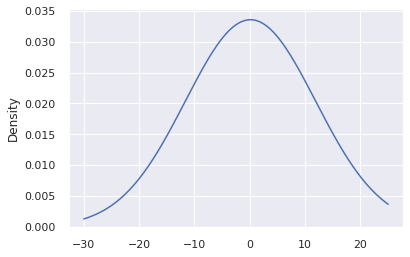

In [ ]:
sns.distplot(X[feats],hist=False, kde_kws={'clip': (-30, 25)})

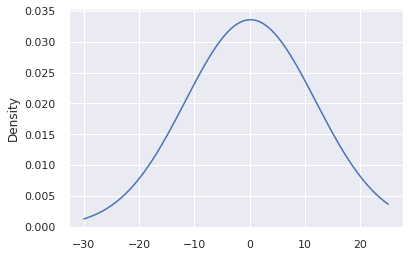

In [ ]:
sns.distplot(test[feats],hist=False, kde_kws={'clip': (-30, 25)})

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
models = []
models.append(('Lasso', Lasso()))
models.append(('Ridge', Ridge()))  
models.append(('ElasticNet', ElasticNet()))  
models.append(('DecisionTreeRegressor', DecisionTreeRegressor())) 
models.append(('XGB', XGBRegressor()))  # XGB 모델
models.append(('LGB', LGBMRegressor()))
models.append(('RendomForestRegressor',RandomForestRegressor()))
for name, model in models:
    accuracies = cross_val_score(estimator=model, X=x_train, y=y_train,cv=10)
    msg = "%s - accuracy's mean : %f, accuracy's std : %f" % (name, accuracies.mean(), accuracies.std())
    print(msg)

Lasso - accuracy's mean : 0.376036, accuracy's std : 0.058692
Ridge - accuracy's mean : 0.912317, accuracy's std : 0.023521
ElasticNet - accuracy's mean : 0.383461, accuracy's std : 0.061736
DecisionTreeRegressor - accuracy's mean : 0.796490, accuracy's std : 0.049268
[02:03:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:03:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:03:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:03:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:03:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:03:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated

#Ridge Regressor

In [ ]:
param_val =[0.01,0.1,1,10,100,500,1000]

In [ ]:
np.random.rand(12)
from sklearn.linear_model import Ridge
for i in param_val:
    # Creat a model
    ridge_model = Ridge(alpha = i).fit(x_train, y_train)
    print('Score = ', ridge_model.score(x_train, y_train),' @ Hyperparameter = ', i)
    predictions = ridge_model.predict(x_test)
    #print('Mean Absolute Error(MAE): ', mean_absolute_error(y_test, predictions))
    #print('Mean Squared Error(MSE): ', mean_squared_error(y_test, predictions))
    print('Root Mean Squared Error(RMSE): ', np.sqrt(mean_squared_error(y_test, predictions)))
    #print('Explained Variance Score(EVS): ', explained_variance_score(y_test, predictions))
    print('R2_Score: ', r2_score(y_test, predictions))
    print('---'*20)

    ##alpha값 100일때 가장 좋은 성능

Score =  0.9426305999255006  @ Hyperparameter =  0.01
Root Mean Squared Error(RMSE):  0.11185755418021225
R2_Score:  0.9103915364739257
------------------------------------------------------------
Score =  0.9425898838911255  @ Hyperparameter =  0.1
Root Mean Squared Error(RMSE):  0.1115142455042543
R2_Score:  0.910940737721153
------------------------------------------------------------
Score =  0.9414935210302637  @ Hyperparameter =  1
Root Mean Squared Error(RMSE):  0.10972400172036849
R2_Score:  0.9137772898954243
------------------------------------------------------------
Score =  0.9364611009634668  @ Hyperparameter =  10
Root Mean Squared Error(RMSE):  0.10587803156288858
R2_Score:  0.9197157952850035
------------------------------------------------------------
Score =  0.9285537313590654  @ Hyperparameter =  100
Root Mean Squared Error(RMSE):  0.10350691562926534
R2_Score:  0.9232714259118765
------------------------------------------------------------
Score =  0.9186763478084

##Random Forest

In [ ]:
n_estimators = [100,300,500,700] # number of trees in the random forest
max_features = ['auto', 'sqrt',0.9,0.75] # number of features in consideration at every split
max_depth = [4,10,None] # maximum number of levels allowed in decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# rf = RandomForestRegressor()
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, random_state = 42, n_jobs = -1)
# rf_random.fit(x_train, y_train)

In [ ]:
# print('Score = ', rf_random.score(x_train, y_train),' @ Hyperparameter = ', i)
# predictions = rf_random.predict(x_test)
# #print('Mean Absolute Error(MAE): ', mean_absolute_error(y_test, predictions))
# #print('Mean Squared Error(MSE): ', mean_squared_error(y_test, predictions))
# print('Root Mean Squared Error(RMSE): ', np.sqrt(mean_squared_error(y_test, predictions)))
# #print('Explained Variance Score(EVS): ', explained_variance_score(y_test, predictions))
# print('R2_Score: ', r2_score(y_test, predictions))


In [ ]:
# features = {}
# for feature, importance in zip(x_train.columns, rf_random.feature_importances_):
#     features[feature] = importance

# importances = pd.DataFrame({"RF":features})
# importances.sort_values("RF", ascending = False, inplace=True)
# importances[:15].plot.bar();

###그렇다면 parameter 조정안한거는? 

In [ ]:
rf_model = RandomForestRegressor().fit(x_train, y_train)
print('Score = ', rf_model.score(x_train, y_train),' @ Hyperparameter = ', i)
predictions = rf_model.predict(x_test)
print('Mean Absolute Error(MAE): ', mean_absolute_error(y_test, predictions))
print('Mean Squared Error(MSE): ', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error(RMSE): ', np.sqrt(mean_squared_error(y_test, predictions)))
print('Explained Variance Score(EVS): ', explained_variance_score(y_test, predictions))
print('R2_Score: ', r2_score(y_test, predictions))
#L2 normalization , 앙상블하기

Score =  0.9852045012427799  @ Hyperparameter =  1000
Mean Absolute Error(MAE):  0.08386057757753586
Mean Squared Error(MSE):  0.013267452905044313
Root Mean Squared Error(RMSE):  0.11518442995928015
Explained Variance Score(EVS):  0.9053879476734483
R2_Score:  0.904981986323663


#Lasso

In [ ]:
param_val = [0.00001,0.0003,0.0005,0.001,0.005]

In [ ]:
np.random.rand(5)
from sklearn.linear_model import Lasso
for i in param_val:
    # Creat a model
    lasso_model = Lasso(alpha = i).fit(x_train, y_train)
    print('Score = ', lasso_model.score(x_train, y_train),' @ Hyperparameter = ', i)
    predictions = lasso_model.predict(x_test)
    #print('Mean Absolute Error(MAE): ', mean_absolute_error(y_test, predictions))
    #print('Mean Squared Error(MSE): ', mean_squared_error(y_test, predictions))
    print('Root Mean Squared Error(RMSE): ', np.sqrt(mean_squared_error(y_test, predictions)))
    #print('Explained Variance Score(EVS): ', explained_variance_score(y_test, predictions))
    print('R2_Score: ', r2_score(y_test, predictions))
    print('---'*20)

    ##alpha값 0.003일때 가장 좋은 성능

Score =  0.9424976077734841  @ Hyperparameter =  1e-05
Root Mean Squared Error(RMSE):  0.11130012997413187
R2_Score:  0.9112824100188476
------------------------------------------------------------
Score =  0.9376780399353434  @ Hyperparameter =  0.0003
Root Mean Squared Error(RMSE):  0.10538499082279996
R2_Score:  0.9204617709975123
------------------------------------------------------------
Score =  0.933430068518089  @ Hyperparameter =  0.0005
Root Mean Squared Error(RMSE):  0.10410939604889033
R2_Score:  0.9223756016894977
------------------------------------------------------------
Score =  0.9294092404708528  @ Hyperparameter =  0.001
Root Mean Squared Error(RMSE):  0.10205315508403173
R2_Score:  0.9254116045707201
------------------------------------------------------------
Score =  0.9165341844490946  @ Hyperparameter =  0.005
Root Mean Squared Error(RMSE):  0.10955565497158794
R2_Score:  0.9140416655552942
------------------------------------------------------------


###결론 :  Ridge regression + Gridsearchcv 했을시 RMSE 0.099 이었고 
Lasso+Gridsearchcv했을시 RMSE 0.98955로 근소하게 더 나음

randomforestregressor() 로 했을시 RMSE가 0.126이었음.


#앙상블

#bagging & CV

In [ ]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor , AdaBoostRegressor,ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid=[{
'n_estimators':[0.1,1,10,100,500,1000],
'max_samples':[0.01,0.1,5,100,500,1000]}]

In [ ]:
gs = GridSearchCV(
    estimator  =BaggingRegressor(),
    param_grid=param_grid,
    verbose=True
)

In [ ]:
gs.fit(x_train,y_train)
predict = gs.predict(x_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [ ]:
gs.best_estimator_
print('GridSearchCV best score : {}'.format(gs.best_score_))

GridSearchCV best score : 0.8908099995216109


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print('RMSE : {}'.format(sqrt(mean_squared_error(predict, y_test))))
#print('MAE : {}'.format(mean_absolute_error(y_test, predict)))
#print('MSE : {}'.format(mean_squared_error(predict, y_test)))
print('R2_Score: ', r2_score(y_test, predict))

RMSE : 0.11583553438451132
R2_Score:  0.9039047312400961


##Gradient regressor & CV

In [ ]:
param_grid = {'n_estimators': [500,1000,2000, 3000], 'max_depth': [4, 10, None], 'min_samples_leaf': [5,15], 'min_samples_split': [5, 10],'learning_rate': [0.05, 0.1]}
#param_grid = {'n_estimators': [3000], 'max_depth': [4,10],'learning_rate': [0.05], 'max_features':['auto','sqrt',0.9, 0.8, 0.75]}
#param_grid = {'n_estimators': [3000], 'max_depth': [4,10],'learning_rate': [0.05], 'max_features':['auto','sqrt', 0.8]}
#grid_GB = GridSearchCV(GradientBoostingRegressor(random_state = 13, loss='huber',  max_features='sqrt'), param_grid, cv=3)
grid_GB = GridSearchCV(GradientBoostingRegressor(random_state = 13, loss='huber'), param_grid, cv=3)
grid_GB.fit(x_train, y_train)
print(grid_GB.best_estimator_)
print(grid_GB.best_params_)
GB_score = grid_GB.best_score_
print(GB_score) 

In [ ]:
predict = grid_GB.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print('RMSE : {}'.format(sqrt(mean_squared_error(predict, y_test))))
#print('MAE : {}'.format(mean_absolute_error(y_test, predict)))
#print('MSE : {}'.format(mean_squared_error(predict, y_test)))
print('R2_Score: ', r2_score(y_test, predict))

##adaboost & CV

In [ ]:
param_grid=[{
'learning_rate': [0.5, 1],'n_estimators': [500, 750], 
'base_estimator__max_depth':[4, 8,  None], 'base_estimator__max_features':['auto','sqrt',0.8]
}]


In [ ]:
ada_model = GridSearchCV(
    estimator  =AdaBoostRegressor(),
    param_grid=param_grid,
    verbose=True
)

In [ ]:
ada_model.fit(x_train,y_train)

In [ ]:
predict = ada_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print('RMSE : {}'.format(sqrt(mean_squared_error(predict, y_test))))
#print('MAE : {}'.format(mean_absolute_error(y_test, predict)))
#print('MSE : {}'.format(mean_squared_error(predict, y_test)))
print('R2_Score: ', r2_score(y_test, predict))

##Extra Trees

In [ ]:
param_grid = {'n_estimators': [100,300,500, 750], 'max_depth': [10,20, None], 'bootstrap': [False, True], 'max_samples': [0.8, 0.9, 1], 'max_features':['auto',0.9, 0.8, 0.75]}
grid_ET = GridSearchCV(ExtraTreesRegressor(random_state = 13, n_jobs=-1), param_grid, cv=4)
grid_ET.fit(x_train, y_train)
print(grid_ET.best_estimator_)
print(grid_ET.best_params_)
ET_score = grid_ET.best_score_
print(ET_score) 

In [ ]:
ET=ExtraTreesRegressor(bootstrap=True, max_depth=20, max_features=0.8,
                    max_samples=0.9, n_estimators=750, n_jobs=-1,
                    random_state=13)

ET.fit(x_train,y_train)
                    

In [ ]:
feature_importance = ET.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        ET.estimators_],
                                        axis = 0)

In [ ]:
features = {}
for feature, importance in zip(x_train.columns, ET.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"ET":features})
importances.sort_values("ET", ascending = False, inplace=True)
importances[:15].plot.bar();

In [ ]:
predict=grid_ET.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print('RMSE : {}'.format(sqrt(mean_squared_error(predict, y_test))))
#print('MAE : {}'.format(mean_absolute_error(y_test, predict)))
#print('MSE : {}'.format(mean_squared_error(predict, y_test)))
print('R2_Score: ', r2_score(y_test, predict))

#Elastic Model

In [ ]:
param_grid = {'alpha': [0.05,0.1,0.5, 1],'l1_ratio':[0.1,0.25, 0.5, 0.75,0.9]}
elastic_grid = GridSearchCV(ElasticNet(random_state=13, max_iter = 10000), param_grid, cv=4)
elastic_grid.fit(x_train, y_train)
print(elastic_grid.best_estimator_)
print(elastic_grid.best_params_)
elastic_score = elastic_grid.best_score_
print(elastic_score)

In [ ]:
elastic_grid.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print('RMSE : {}'.format(sqrt(mean_squared_error(predict, y_test))))
#print('MAE : {}'.format(mean_absolute_error(y_test, predict)))
#print('MSE : {}'.format(mean_squared_error(predict, y_test)))
print('R2_Score: ', r2_score(y_test, predict))

###결론 : 앙상블 기법중에서는 gradient boosting이 가장 좋게 나왔음. RMSE: 0.11최고인것같다.

#Submission

In [ ]:
Id=test['Id']
test=test.drop('Id',axis=1)
pred=grid_ET.predict(test)
submission = pd.DataFrame({'Id': Id, 'SalePrice': np.exp(pred)})
submission.to_csv('houseprice_submission.csv',index=False)

In [ ]:
pd.read_csv('houseprice_submission.csv').head()